## Problem: 

Seismic data is collected using reflection seismology, or seismic reflection. The method requires a controlled seismic source of energy, such as compressed air or a seismic vibrator, and sensors record the reflection from rock interfaces within the subsurface. The recorded data is then processed to create a 3D view of earth’s interior. Reflection seismology is similar to X-ray, sonar and echolocation.

A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. In theory, the strength of reflection is directly proportional to the difference in the physical properties on either sides of the interface. While seismic images show rock boundaries, they don't say much about the rock themselves; some rocks are easy to identify while some are difficult.

There are several areas of the world where there are vast quantities of salt in the subsurface. One of the challenges of seismic imaging is to identify the part of subsurface which is salt. Salt has characteristics that makes it both simple and hard to identify. Salt density is usually 2.14 g/cc which is lower than most surrounding rocks. The seismic velocity of salt is 4.5 km/sec, which is usually faster than its surrounding rocks. This difference creates a sharp reflection at the salt-sediment interface. Usually salt is an amorphous rock without much internal structure. This means that there is typically not much reflectivity inside the salt, unless there are sediments trapped inside it. The unusually high seismic velocity of salt can create problems with seismic imaging.

### Data
The data is a set of images chosen at various locations chosen at random in the subsurface. The images are 101 x 101 pixels and each pixel is classified as either salt or sediment. In addition to the seismic images, the depth of the imaged location is provided for each image. The goal of the competition is to segment regions that contain salt.

#### Source: 
https://www.kaggle.com/c/tgs-salt-identification-challenge


### Note: 
Accept the terms and download data from the above link

### Aim: 

In this, you are asked to segment salt deposits beneath the Earth’s surface. Given a set of seismic images that are 101 x 101 pixels each and each pixel we need to classify as either salt or sediment. Our goal is to segment regions that contain salt. A seismic image is produced from imaging the reflection coming from rock boundaries. The seismic image shows the boundaries between different rock types. 

### Broad Steps:

1. Download the dataset
2. Upload to Drive
3. Import from drive to colab
4. Load the images and create training data.

In [1]:
import os
import numpy as np
import pandas as pd

from random import randint

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split

from skimage.transform import resize

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout

from tqdm import tqdm_notebook

C:\Users\Balajisri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Balajisri\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Balajisri\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Balajisri\Anaconda3\lib\site-packages\tensorflow\p

In [2]:
#Mount drive
#from google.colab import drive
#drive.mount('/content/drive/')

### 1.Set your project path where you have your data and related files for this lab.

In [3]:
project_path = 'D:/Documents/Great Lakes/Labs/Lab8/external'

In [4]:
from zipfile import ZipFile
with ZipFile('tgs-salt-identification-challenge.zip','r') as z:
    z.extractall()

### 2. Set the necessary parameters

## Setup

In [5]:
im_width = 128      #width of your train image
im_height = 128     #hight of your train image
#border =        
path_train = project_path + 'train/'   #Path for your train data

In [6]:
img_size_ori = 101
img_size_target = 128

def upsample(img):
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_target, img_size_target), mode='constant', preserve_range=True)
    #res = np.zeros((img_size_target, img_size_target), dtype=img.dtype)
    #res[:img_size_ori, :img_size_ori] = img
    #return res
    
def downsample(img):
    if img_size_ori == img_size_target:
        return img
    return resize(img, (img_size_ori, img_size_ori), mode='constant', preserve_range=True)
    #return img[:img_size_ori, :img_size_ori]

# 3. Make directory for train data at in your project/lab folder.

Hint - use !mkdir function.

In [7]:
#os.chdir("/content/drive/My Drive/Colab Notebooks/Lab_Res9_External/")

In [8]:
!mkdir train

A subdirectory or file train already exists.


# 4. Extract your train images to the train directory you have just created above. 
train.zip and test.zip files available at your google drive/local system.

As a good practice - Upload or copy the data at your project path folder.

Make sure you are providing the right project_path.

In [9]:
#For simplicity we have added the required code here.
from zipfile import ZipFile

with ZipFile(project_path + '/train.zip', 'r') as zf:
    zf.extractall('train/')


In [10]:
#The train file have both images and masks with the same names_ids.

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'competition_data.zip',
 'data',
 'data.zip',
 'depths.csv',
 'flamingo.zip',
 'R9_External_Lab_Questions.ipynb',
 'R9_External_Lab_Questions_1_new.ipynb',
 'sample_submission.csv',
 'test.zip',
 'tgs-salt-identification-challenge.zip',
 'train',
 'train.csv',
 'train.zip']

### 5. Get the list of names of images and masks and name the list imagelist and masklist.

Hint - Use os.listdir() funtions.

In [12]:
#os.chdir("/content/drive/My Drive/Colab Notebooks/Lab_Res9_External/train")

In [13]:
#Test your list names by printing some of the names as given below.


In [14]:
os.chdir(r"D:\Documents\Great Lakes\Labs\Lab8\external\train/images")

In [15]:
imagelist =os.listdir()

In [16]:
os.chdir(r"D:\Documents\Great Lakes\Labs\Lab8\external\train/masks")

In [17]:
masklist=os.listdir()

In [18]:
print(imagelist[:10])

['000e218f21.png', '003c477d7c.png', '00441f1cf2.png', '0050766ae2.png', '005b452274.png', '0061281eea.png', '008a50a2ec.png', '00950d1627.png', '00a3af90ab.png', '00cda0328c.png']


In [19]:
print(masklist[:10])

['000e218f21.png', '003c477d7c.png', '00441f1cf2.png', '0050766ae2.png', '005b452274.png', '0061281eea.png', '008a50a2ec.png', '00950d1627.png', '00a3af90ab.png', '00cda0328c.png']


# 6. Read and test your images and respective masks.

Hint -

import  matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread('path of image'))

plt.imshow(cv2.imread('path of mask'))


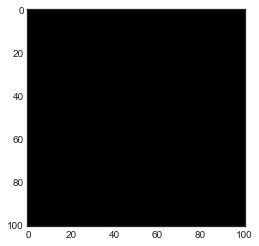

In [20]:
import matplotlib.pyplot as plt

import cv2

plt.imshow(cv2.imread(masklist[19]))


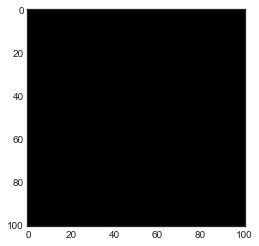

In [21]:
plt.imshow(cv2.imread(imagelist[19]))

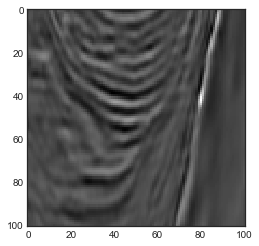

In [22]:
import matplotlib.pyplot as plt

import cv2
plt.imshow(cv2.imread(r'D:\Documents\Great Lakes\Labs\Lab8\external\train/images/b70f0ab0c2.png'))


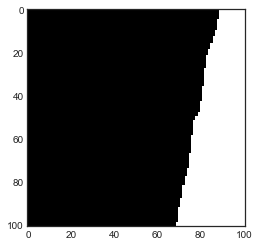

In [23]:
plt.imshow(cv2.imread(r'D:\Documents\Great Lakes\Labs\Lab8\external\train/masks/b70f0ab0c2.png'))

# 7. Create your training data.

Hints - 

image_path = os.path.join(project_path +'path of your image directory' +n )

mask_path = os.path.join(project_path +'path of your mask directory'+n )

In [24]:
import pandas as pd
import numpy as np

In [25]:
project_path = 'D:/Documents/Great Lakes/Labs/Lab8/external/'

In [26]:
train_df = pd.read_csv(project_path+'train.csv', index_col="id", usecols=[0])
depths_df = pd.read_csv(project_path+'depths.csv', index_col="id")
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

In [27]:
train_df["images"] = [np.array(load_img(project_path+"train/images/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

C:\Users\Balajisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

In [28]:
train_df["masks"] = [np.array(load_img(project_path+"train/masks/{}.png".format(idx), grayscale=True)) / 255 for idx in tqdm_notebook(train_df.index)]

C:\Users\Balajisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Balajisri\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  war

In [29]:
train_df["coverage"] = train_df.masks.map(np.sum) / pow(img_size_ori, 2)

In [30]:
def cov_to_class(val):    
    for i in range(0, 11):
        if val * 10 <= i :
            return i
        
train_df["coverage_class"] = train_df.coverage.map(cov_to_class)

C:\Users\Balajisri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Coverage class')

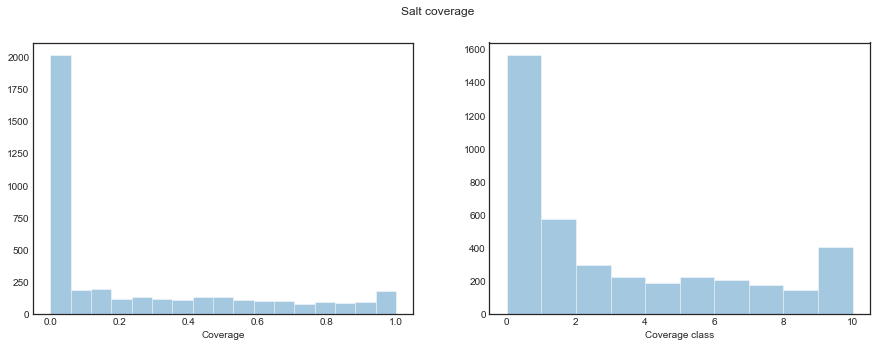

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train_df.coverage, kde=False, ax=axs[0])
sns.distplot(train_df.coverage_class, bins=10, kde=False, ax=axs[1])
plt.suptitle("Salt coverage")
axs[0].set_xlabel("Coverage")
axs[1].set_xlabel("Coverage class")

Text(0,0.5,'Coverage class')

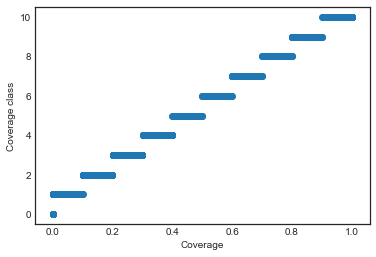

In [32]:
plt.scatter(train_df.coverage, train_df.coverage_class)
plt.xlabel("Coverage")
plt.ylabel("Coverage class")

In [33]:
# Split train and valid

In [34]:
ids_train, ids_valid, x_train, x_valid, y_train, y_valid, cov_train, cov_test, depth_train, depth_test = train_test_split(
    train_df.index.values,
    np.array(train_df.images.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1), 
    np.array(train_df.masks.map(upsample).tolist()).reshape(-1, img_size_target, img_size_target, 1), 
    train_df.coverage.values,
    train_df.z.values,
    test_size=0.2, stratify=train_df.coverage_class, random_state=1337)

In [35]:
## Test your data whether it looks fine - Random check
# Check if training data looks all right


Text(0.5,1,'Scaled image')

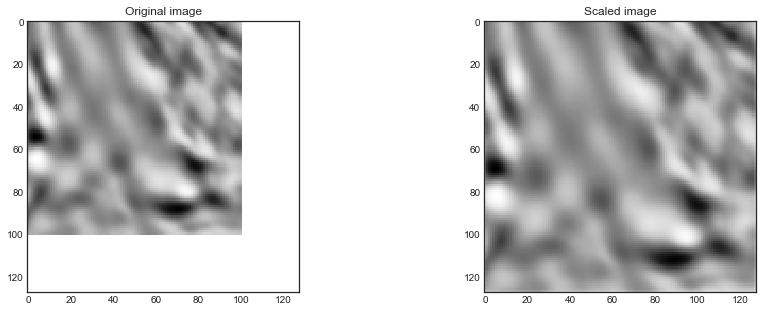

In [36]:
tmp_img = np.zeros((img_size_target, img_size_target), dtype=train_df.images.loc[ids_train[10]].dtype)
tmp_img[:img_size_ori, :img_size_ori] = train_df.images.loc[ids_train[10]]
fix, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].imshow(tmp_img, cmap="Greys")
axs[0].set_title("Original image")
axs[1].imshow(x_train[10].squeeze(), cmap="Greys")
axs[1].set_title("Scaled image")

# Text generation using a RNN

Given a sequence of words from this data, train a model to predict the next word in the sequence. Longer sequences of text can be generated by calling the model repeatedly.

**Mount your Google Drive**

In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

In [38]:
import os
os.chdir('D:/Documents/Great Lakes/Labs/Lab8/external/data')

### Import Keras and other libraries

In [39]:
#Unix style pathname pattern expansion
import glob

from sklearn.utils import shuffle
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Bidirectional
from keras.optimizers import Adam
from keras import backend

## Download data
Reference: Data is collected from http://www.gutenberg.org

For the lab purpose, you can load the dataset provided by Great Learning

### Load the Oscar Wilde dataset

Store all the ".txt" file names in a list

In [40]:
oscarlist = glob.glob("*.txt")
print(oscarlist)

['A Critic in Pall Mall.txt', 'A House of Pomegranates.txt', 'A Woman of No Importance a play.txt', 'An Ideal Husband.txt', 'Charmides and Other Poems.txt', 'Children in Prison and Other Cruelties of Prison Life.txt', 'De Profundis.txt', 'Essays and Lectures.txt', 'For Love of the King.txt', 'Impressions of America.txt', 'Intentions.txt', 'Lady Windermere_s Fan.txt', 'Lord Arthur Savile_s Crime.txt', 'Miscellaneous Aphorisms_ The Soul of Man.txt', 'Miscellanies.txt', 'Oscar Wilde Miscellaneous.txt', 'Poems with the Ballad of Reading Gaol.txt', 'Reviews.txt', 'Rose Leaf and Apple Leaf.txt', 'Salomé A tragedy in one act.txt', 'Selected poems of oscar wilde including The Ballad of Reading Gaol.txt', 'Selected prose of oscar wilde with a Preface by Robert Ross.txt', 'Shorter Prose Pieces.txt', 'The Ballad of Reading Gaol.txt', 'The Canterville Ghost.txt', 'The Duchess of Padua.txt', 'The Happy Prince and other tales.txt', 'The Importance of Being Earnest.txt', 'The Picture of Dorian Gray.t

### Read the data

Read contents of every file from the list and append the text in a new list

In [41]:
codetext = []
bookranges = []
for shakefile in oscarlist:
    #open each file in read mode
    shaketext = open(shakefile, "r", encoding='utf8')
    start = len(codetext)
    codetext.append(shaketext.read())
    end = len(codetext)
    #append start and end
    bookranges.append({"start": start, "end": end, "name": shakefile.rsplit("/", 1)[-1]})
    shaketext.close()

## Process the text
Initialize and fit the tokenizer

In [42]:
#Filter the special characters
#Ref:- https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

tokenizer = Tokenizer(lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(codetext)

In [43]:
# summarize what was learned
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

OrderedDict([('\ufeffthe', 30), ('project', 2634), ('gutenberg', 2903), ('ebook', 324), ('a', 22045), ('critic', 221), ('in', 18625), ('pall', 241), ('mall', 220), ('by', 5255), ('oscar', 182), ('wilde', 251), ('edited', 46), ('e', 749), ('v', 46), ('lucas', 4), ('this', 4644), ('is', 17221), ('for', 8728), ('the', 64874), ('use', 743), ('of', 41415), ('anyone', 188), ('anywhere', 106), ('at', 5424), ('no', 3601), ('cost', 108), ('and', 35342), ('with', 9022), ('almost', 371), ('restrictions', 63), ('whatsoever', 99), ('you', 9737), ('may', 1871), ('copy', 425), ('it', 11877), ('give', 819), ('away', 751), ('or', 5791), ('re', 106), ('under', 627), ('terms', 687), ('license', 486), ('included', 113), ('online', 129), ('www', 291), ('org', 331), ('title', 106), ('author', 195), ('editor', 52), ('release', 41), ('date', 137), ('october', 39), ('6', 131), ('2009', 2), ('30191', 4), ('language', 187), ('english', 557), ('character', 253), ('set', 600), ('encoding', 23), ('utf', 17), ('8', 


31


{'the': 1, 'of': 2, 'and': 3, 'to': 4, 'a': 5, 'in': 6, 'is': 7, 'that': 8, 'i': 9, 'it': 10, 'you': 11, 'he': 12, 'with': 13, 'for': 14, 'as': 15, 'not': 16, 'his': 17, 'was': 18, 'be': 19, 'are': 20, 'or': 21, 'have': 22, 'on': 23, 'but': 24, 'at': 25, 'by': 26, 'this': 27, 'from': 28, 'all': 29, 'one': 30, 'her': 31, 'they': 32, 'we': 33, 'which': 34, 'him': 35, 'no': 36, 'had': 37, 'who': 38, 'me': 39, 'my': 40, 'so': 41, 'has': 42, 'what': 43, 'will': 44, 'there': 45, 'an': 46, 'gutenberg': 47, 'she': 48, 'its': 49, 'their': 50, 'any': 51, 'project': 52, 'if': 53, 'do': 54, 'work': 55, 'when': 56, 'life': 57, 'them': 58, 'us': 59, 'lord': 60, 'your': 61, 'like': 62, 'were': 63, 'would': 64, 'some': 65, 'mr': 66, 'art': 67, 'very': 68, 'more': 69, 'man': 70, 'can': 71, 'may': 72, 'been': 73, 'about': 74, 'out': 75, '’': 76, 'should': 77, 'than': 78, 'our': 79, 'great': 80, 'tm': 81, 'said': 82, 'must': 83, 'lady': 84, 'other': 85, '1': 86, 'most': 87, 'into': 88, 'such': 89, 'never

defaultdict(<class 'int'>, {'glinting': 2, 'impassioned': 6, 'arcadia—a': 1, 'début': 6, 'slight': 13, 'parva': 2, 'teller': 5, 'manifest': 4, 'paying': 31, 'neuf': 2, 'light': 27, 'caius': 4, 'becket': 2, 'bishop': 13, 'confirmed': 30, 'wilde’': 1, 'velarium': 3, 'prohibition': 30, 'objected': 10, 'sirs': 3, 'abstractions': 4, '‘marquise': 1, 'englishwoman': 3, 'description': 9, 'defence': 8, 'diet': 3, 'creusa': 2, 'mostly': 4, 'grey': 25, 'move': 20, 'disturbed': 9, 'sounded': 12, 'saying': 23, 'drew': 17, 'became': 19, 'whewell': 2, 'wrought': 21, '‘we': 5, 'mifflin': 2, 'its': 31, 'tickets': 4, 'glimmer': 4, 'laughing': 26, 'length': 13, 'petrie': 2, 'plies': 2, 'innumerable': 7, 'hypertext': 31, 'lecturers': 3, 'visible': 15, 'displaced': 4, 'tm': 31, 'animal': 14, 'pathos': 13, 'ribs': 2, 'redes': 2, 'b': 31, 'april': 16, 'dunciad': 3, 'refuse': 12, 'pepper': 3, 'powdered': 9, 'porta': 2, 'groanin’': 1, 'blackened': 6, 'alton': 3, 'whenever': 31, 'doves': 11, 'check': 31, 'defia

### Vectorize the text

Before training, we need to map strings to a numerical representation. Create two lookup tables: one mapping words to numbers, and another for numbers to words.

In [44]:
word_idx = tokenizer.word_index
idx_word = tokenizer.index_word

Get the word count for every word and also get the total number of words.

In [45]:
word_counts = tokenizer.word_counts
num_words = len(word_idx) + 1

Convert text to sequence of numbers

In [46]:
#Transform each text in texts in a sequence of integers.
sequences = tokenizer.texts_to_sequences(codetext)

In [47]:
print(sequences[0])

[3244, 52, 47, 365, 5, 533, 6, 490, 535, 26, 656, 474, 2290, 26, 157, 2291, 11349, 27, 365, 7, 14, 1, 162, 2, 624, 1079, 25, 36, 1058, 3, 13, 317, 36, 1732, 1145, 11, 72, 273, 10, 142, 10, 154, 21, 1080, 162, 10, 184, 1, 172, 2, 1, 52, 47, 239, 1027, 13, 27, 365, 21, 906, 25, 413, 47, 355, 1081, 5, 533, 6, 490, 535, 607, 656, 474, 2061, 157, 2291, 11349, 2490, 863, 2598, 895, 15779, 365, 11350, 628, 213, 471, 200, 3931, 4824, 570, 938, 2, 1, 52, 47, 365, 5, 533, 6, 490, 535, 3829, 28, 1, 11351, 2133, 698, 3531, 483, 26, 1856, 982, 1127, 3932, 916, 355, 5, 533, 6, 490, 535, 139, 5214, 28, 4475, 3, 7600, 26, 656, 474, 2133, 698, 3531, 4476, 5215, 594, 1043, 427, 396, 127, 781, 6, 11351, 27, 1857, 42, 73, 108, 26, 66, 157, 2291, 11349, 3712, 297, 1, 1421, 2, 907, 86, 6271, 1028, 23, 414, 487, 4187, 3, 4825, 570, 599, 23, 2170, 3465, 21344, 1, 21345, 25, 1059, 2775, 5, 4648, 4, 745, 3623, 4, 254, 21, 16, 4, 254, 4986, 1, 560, 2, 5, 80, 216, 4056, 8230, 6, 314, 3245, 1, 286, 2, 1, 99, 5435,

### Generate Features and Labels

In [48]:
features = []
labels = []

training_length = 50
# Iterate through the sequences of tokens
for seq in sequences:
    # Create multiple training examples from each sequence
    for i in range(training_length, training_length+300):
        # Extract the features and label
        extract = seq[i - training_length: i - training_length + 20]

        # Set the features and label
        features.append(extract[:-1])
        labels.append(extract[-1])

### The prediction task

Given a word, or a sequence of words, what is the most probable next word? This is the task we're training the model to perform. The input to the model will be a sequence of words, and we train the model to predict the output—the following word at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the words computed until this moment, what is the next word?

### Generate training and testing data

In [49]:
from sklearn.utils import shuffle
import numpy as np

features, labels = shuffle(features, labels, random_state=1)

# Decide on number of samples for training
train_end = int(0.7 * len(labels))

train_features = np.array(features[:train_end])
valid_features = np.array(features[train_end:])

train_labels = labels[:train_end]
valid_labels = labels[train_end:]

# Convert to arrays
X_train, X_valid = np.array(train_features), np.array(valid_features)

# Using int8 for memory savings
y_train = np.zeros((len(train_labels), num_words), dtype=np.int8)
y_valid = np.zeros((len(valid_labels), num_words), dtype=np.int8)

# One hot encoding of labels
for example_index, word_index in enumerate(train_labels):
    y_train[example_index, word_index] = 1

for example_index, word_index in enumerate(valid_labels):
    y_valid[example_index, word_index] = 1

This is just to check the features and labels

In [50]:
for i, sequence in enumerate(X_train[:2]):
    text = []
#     print(i, sequence)
    for idx in sequence:
        text.append(idx_word[idx])
        
    print('Features: ' + ' '.join(text)+'\n')
    print('Label: ' + idx_word[np.argmax(y_train[i])] + '\n')

Features: 25 minutes act ii room in the duke’s palace 36 minutes act iii corridor in the duke’s palace 29

Label: minutes

Features: email ccx074 pglaf org note that later editions of de profundis contained more material the most complete editions are

Label: still



## Build The Model

Use `keras.Sequential` to define the model. For this simple example three layers are used to define our model:

* `keras.layers.Embedding`: The input layer. A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
* `keras.layers.LSTM`: A type of RNN with size `units=rnn_units` (You can also use a GRU layer here.)
* `keras.layers.Dense`: The output layer, with `num_words` outputs.

In [51]:
model = Sequential()

# Embedding layer
model.add(
    Embedding(
        input_dim=len(word_idx) + 1,
        output_dim=100,
        weights=None,
        trainable=True))

# Recurrent layer
model.add(
    LSTM(
        64, return_sequences=False, dropout=0.1,
        recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_words, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         3283900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32839)             2134535   
Total params: 5,464,835
Trainable params: 5,464,835
Non-trainable params: 0
_________________________________________________________________


For each word the model looks up the embedding, runs the LSTM one timestep with the embedding as input, and applies the dense layer to generate logits predicting the log-liklihood of the next word.

## Train the model

In [52]:
h = model.fit(X_train, y_train, epochs = 100, batch_size = 50, 
          verbose = 1)## Train the model

Epoch 1/100
6510/6510 [==============================] - ETA: 5:48 - loss: 10.3994 - acc: 0.0000e+ - ETA: 2:56 - loss: 10.3991 - acc: 0.0100   - ETA: 1:29 - loss: 10.3986 - acc: 0.00 - ETA: 1:00 - loss: 10.3981 - acc: 0.00 - ETA: 51s - loss: 10.3977 - acc: 0.0086 - ETA: 40s - loss: 10.3968 - acc: 0.013 - ETA: 33s - loss: 10.3960 - acc: 0.023 - ETA: 28s - loss: 10.3951 - acc: 0.023 - ETA: 26s - loss: 10.3944 - acc: 0.027 - ETA: 23s - loss: 10.3934 - acc: 0.030 - ETA: 21s - loss: 10.3920 - acc: 0.032 - ETA: 20s - loss: 10.3912 - acc: 0.033 - ETA: 18s - loss: 10.3891 - acc: 0.039 - ETA: 16s - loss: 10.3873 - acc: 0.038 - ETA: 16s - loss: 10.3857 - acc: 0.040 - ETA: 14s - loss: 10.3818 - acc: 0.039 - ETA: 13s - loss: 10.3744 - acc: 0.039 - ETA: 13s - loss: 10.3685 - acc: 0.042 - ETA: 12s - loss: 10.3538 - acc: 0.043 - ETA: 11s - loss: 10.3241 - acc: 0.042 - ETA: 11s - loss: 10.3083 - acc: 0.042 - ETA: 10s - loss: 10.2664 - acc: 0.043 - ETA: 10s - loss: 10.2400 - acc: 0.044 - ETA: 9s - loss

6510/6510 [==============================] - ETA: 5s - loss: 6.2899 - acc: 0.100 - ETA: 4s - loss: 6.4738 - acc: 0.066 - ETA: 4s - loss: 6.3622 - acc: 0.052 - ETA: 4s - loss: 6.4487 - acc: 0.043 - ETA: 4s - loss: 6.4439 - acc: 0.045 - ETA: 4s - loss: 6.5011 - acc: 0.056 - ETA: 4s - loss: 6.5908 - acc: 0.054 - ETA: 4s - loss: 6.5659 - acc: 0.061 - ETA: 4s - loss: 6.5466 - acc: 0.061 - ETA: 4s - loss: 6.5440 - acc: 0.062 - ETA: 4s - loss: 6.5579 - acc: 0.062 - ETA: 4s - loss: 6.5628 - acc: 0.060 - ETA: 4s - loss: 6.5557 - acc: 0.060 - ETA: 4s - loss: 6.5494 - acc: 0.060 - ETA: 4s - loss: 6.5350 - acc: 0.061 - ETA: 4s - loss: 6.5022 - acc: 0.065 - ETA: 4s - loss: 6.4897 - acc: 0.065 - ETA: 3s - loss: 6.4691 - acc: 0.066 - ETA: 3s - loss: 6.4554 - acc: 0.067 - ETA: 3s - loss: 6.4513 - acc: 0.068 - ETA: 3s - loss: 6.4622 - acc: 0.067 - ETA: 3s - loss: 6.4534 - acc: 0.066 - ETA: 3s - loss: 6.4508 - acc: 0.066 - ETA: 3s - loss: 6.4547 - acc: 0.067 - ETA: 3s - loss: 6.4555 - acc: 0.068 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 5.7797 - acc: 0.080 - ETA: 4s - loss: 5.7973 - acc: 0.086 - ETA: 4s - loss: 5.8465 - acc: 0.084 - ETA: 4s - loss: 5.9869 - acc: 0.080 - ETA: 4s - loss: 6.1212 - acc: 0.077 - ETA: 4s - loss: 6.1537 - acc: 0.076 - ETA: 4s - loss: 6.1819 - acc: 0.075 - ETA: 4s - loss: 6.1940 - acc: 0.069 - ETA: 4s - loss: 6.2258 - acc: 0.064 - ETA: 4s - loss: 6.2562 - acc: 0.062 - ETA: 4s - loss: 6.2731 - acc: 0.062 - ETA: 4s - loss: 6.2724 - acc: 0.060 - ETA: 4s - loss: 6.2939 - acc: 0.060 - ETA: 4s - loss: 6.2503 - acc: 0.062 - ETA: 3s - loss: 6.2448 - acc: 0.062 - ETA: 3s - loss: 6.2385 - acc: 0.059 - ETA: 3s - loss: 6.2107 - acc: 0.060 - ETA: 3s - loss: 6.2234 - acc: 0.059 - ETA: 3s - loss: 6.2364 - acc: 0.057 - ETA: 3s - loss: 6.2144 - acc: 0.059 - ETA: 3s - loss: 6.2207 - acc: 0.060 - ETA: 3s - loss: 6.2066 - acc: 0.062 - ETA: 3s - loss: 6.2178 - acc: 0.063 - ETA: 3s - loss: 6.2008 - acc: 0.062 - ETA: 3s - loss: 6.2108 - acc: 0.061 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 5.9063 - acc: 0.100 - ETA: 4s - loss: 5.8335 - acc: 0.113 - ETA: 4s - loss: 5.7854 - acc: 0.096 - ETA: 4s - loss: 5.7831 - acc: 0.088 - ETA: 4s - loss: 5.8064 - acc: 0.087 - ETA: 4s - loss: 5.8125 - acc: 0.094 - ETA: 4s - loss: 5.8783 - acc: 0.081 - ETA: 4s - loss: 5.9645 - acc: 0.071 - ETA: 4s - loss: 5.9771 - acc: 0.070 - ETA: 4s - loss: 5.9796 - acc: 0.067 - ETA: 4s - loss: 5.9588 - acc: 0.071 - ETA: 3s - loss: 5.9283 - acc: 0.071 - ETA: 3s - loss: 5.9332 - acc: 0.074 - ETA: 3s - loss: 5.9392 - acc: 0.071 - ETA: 3s - loss: 5.9609 - acc: 0.068 - ETA: 3s - loss: 5.9986 - acc: 0.065 - ETA: 3s - loss: 6.0138 - acc: 0.064 - ETA: 3s - loss: 5.9909 - acc: 0.067 - ETA: 3s - loss: 5.9950 - acc: 0.067 - ETA: 3s - loss: 5.9862 - acc: 0.068 - ETA: 3s - loss: 5.9802 - acc: 0.067 - ETA: 3s - loss: 5.9764 - acc: 0.068 - ETA: 3s - loss: 5.9697 - acc: 0.066 - ETA: 3s - loss: 5.9593 - acc: 0.067 - ETA: 3s - loss: 5.9512 - acc: 0.068 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 5.3371 - acc: 0.120 - ETA: 4s - loss: 5.5008 - acc: 0.080 - ETA: 4s - loss: 5.5873 - acc: 0.080 - ETA: 4s - loss: 5.5570 - acc: 0.080 - ETA: 4s - loss: 5.5455 - acc: 0.070 - ETA: 4s - loss: 5.5297 - acc: 0.068 - ETA: 4s - loss: 5.5481 - acc: 0.071 - ETA: 4s - loss: 5.5463 - acc: 0.071 - ETA: 4s - loss: 5.5774 - acc: 0.071 - ETA: 4s - loss: 5.6046 - acc: 0.067 - ETA: 4s - loss: 5.6076 - acc: 0.069 - ETA: 4s - loss: 5.6279 - acc: 0.068 - ETA: 4s - loss: 5.6539 - acc: 0.070 - ETA: 3s - loss: 5.6658 - acc: 0.070 - ETA: 4s - loss: 5.6610 - acc: 0.070 - ETA: 3s - loss: 5.6858 - acc: 0.069 - ETA: 3s - loss: 5.6779 - acc: 0.070 - ETA: 3s - loss: 5.6811 - acc: 0.069 - ETA: 3s - loss: 5.6768 - acc: 0.069 - ETA: 3s - loss: 5.6767 - acc: 0.070 - ETA: 3s - loss: 5.6702 - acc: 0.070 - ETA: 3s - loss: 5.6819 - acc: 0.072 - ETA: 3s - loss: 5.6918 - acc: 0.072 - ETA: 3s - loss: 5.6845 - acc: 0.073 - ETA: 3s - loss: 5.6815 - acc: 0.072 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 5.3280 - acc: 0.100 - ETA: 4s - loss: 5.4467 - acc: 0.066 - ETA: 4s - loss: 5.5374 - acc: 0.076 - ETA: 4s - loss: 5.6040 - acc: 0.073 - ETA: 4s - loss: 5.5943 - acc: 0.080 - ETA: 4s - loss: 5.5988 - acc: 0.080 - ETA: 4s - loss: 5.5497 - acc: 0.078 - ETA: 4s - loss: 5.4924 - acc: 0.073 - ETA: 4s - loss: 5.5152 - acc: 0.074 - ETA: 4s - loss: 5.5311 - acc: 0.072 - ETA: 4s - loss: 5.4889 - acc: 0.077 - ETA: 4s - loss: 5.4889 - acc: 0.077 - ETA: 4s - loss: 5.4762 - acc: 0.082 - ETA: 4s - loss: 5.4808 - acc: 0.080 - ETA: 4s - loss: 5.4821 - acc: 0.078 - ETA: 3s - loss: 5.4607 - acc: 0.078 - ETA: 3s - loss: 5.4319 - acc: 0.081 - ETA: 3s - loss: 5.4201 - acc: 0.085 - ETA: 3s - loss: 5.4268 - acc: 0.085 - ETA: 3s - loss: 5.4249 - acc: 0.086 - ETA: 3s - loss: 5.4580 - acc: 0.083 - ETA: 3s - loss: 5.4691 - acc: 0.082 - ETA: 3s - loss: 5.4644 - acc: 0.085 - ETA: 3s - loss: 5.4691 - acc: 0.085 - ETA: 3s - loss: 5.4783 - acc: 0.084 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 6.1367 - acc: 0.060 - ETA: 6s - loss: 5.8387 - acc: 0.100 - ETA: 5s - loss: 5.6554 - acc: 0.090 - ETA: 5s - loss: 5.4559 - acc: 0.100 - ETA: 5s - loss: 5.3200 - acc: 0.110 - ETA: 5s - loss: 5.3151 - acc: 0.102 - ETA: 5s - loss: 5.3821 - acc: 0.101 - ETA: 5s - loss: 5.3623 - acc: 0.104 - ETA: 4s - loss: 5.3659 - acc: 0.101 - ETA: 4s - loss: 5.3984 - acc: 0.097 - ETA: 4s - loss: 5.3647 - acc: 0.101 - ETA: 4s - loss: 5.3010 - acc: 0.105 - ETA: 4s - loss: 5.2895 - acc: 0.104 - ETA: 4s - loss: 5.2824 - acc: 0.100 - ETA: 4s - loss: 5.2624 - acc: 0.102 - ETA: 4s - loss: 5.2710 - acc: 0.098 - ETA: 4s - loss: 5.2713 - acc: 0.100 - ETA: 3s - loss: 5.2503 - acc: 0.102 - ETA: 3s - loss: 5.2512 - acc: 0.103 - ETA: 3s - loss: 5.2449 - acc: 0.103 - ETA: 3s - loss: 5.2525 - acc: 0.104 - ETA: 3s - loss: 5.2692 - acc: 0.103 - ETA: 3s - loss: 5.2863 - acc: 0.103 - ETA: 3s - loss: 5.2904 - acc: 0.101 - ETA: 3s - loss: 5.3072 - acc: 0.099 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 4.5765 - acc: 0.140 - ETA: 5s - loss: 4.6696 - acc: 0.140 - ETA: 4s - loss: 4.8373 - acc: 0.128 - ETA: 4s - loss: 4.9148 - acc: 0.128 - ETA: 4s - loss: 4.8787 - acc: 0.135 - ETA: 4s - loss: 4.8961 - acc: 0.143 - ETA: 4s - loss: 4.9864 - acc: 0.135 - ETA: 4s - loss: 5.0019 - acc: 0.130 - ETA: 4s - loss: 4.9730 - acc: 0.127 - ETA: 4s - loss: 4.9493 - acc: 0.125 - ETA: 4s - loss: 4.9710 - acc: 0.124 - ETA: 4s - loss: 4.9537 - acc: 0.125 - ETA: 4s - loss: 4.9812 - acc: 0.121 - ETA: 4s - loss: 4.9901 - acc: 0.122 - ETA: 3s - loss: 5.0124 - acc: 0.122 - ETA: 3s - loss: 4.9983 - acc: 0.124 - ETA: 3s - loss: 4.9959 - acc: 0.127 - ETA: 3s - loss: 5.0012 - acc: 0.126 - ETA: 3s - loss: 4.9722 - acc: 0.130 - ETA: 3s - loss: 4.9465 - acc: 0.135 - ETA: 3s - loss: 4.9240 - acc: 0.140 - ETA: 3s - loss: 4.9129 - acc: 0.140 - ETA: 3s - loss: 4.8977 - acc: 0.140 - ETA: 3s - loss: 4.9023 - acc: 0.140 - ETA: 3s - loss: 4.9025 - acc: 0.140 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 4.8214 - acc: 0.180 - ETA: 4s - loss: 4.6396 - acc: 0.253 - ETA: 4s - loss: 4.5681 - acc: 0.240 - ETA: 4s - loss: 4.5323 - acc: 0.217 - ETA: 4s - loss: 4.4807 - acc: 0.206 - ETA: 4s - loss: 4.4031 - acc: 0.209 - ETA: 4s - loss: 4.5289 - acc: 0.203 - ETA: 4s - loss: 4.5168 - acc: 0.202 - ETA: 4s - loss: 4.5816 - acc: 0.197 - ETA: 4s - loss: 4.6143 - acc: 0.189 - ETA: 4s - loss: 4.5838 - acc: 0.197 - ETA: 4s - loss: 4.5804 - acc: 0.196 - ETA: 4s - loss: 4.5677 - acc: 0.197 - ETA: 3s - loss: 4.5616 - acc: 0.193 - ETA: 3s - loss: 4.5511 - acc: 0.189 - ETA: 3s - loss: 4.5318 - acc: 0.192 - ETA: 3s - loss: 4.5171 - acc: 0.192 - ETA: 3s - loss: 4.5119 - acc: 0.197 - ETA: 3s - loss: 4.5153 - acc: 0.196 - ETA: 3s - loss: 4.5376 - acc: 0.194 - ETA: 3s - loss: 4.5344 - acc: 0.192 - ETA: 3s - loss: 4.5162 - acc: 0.194 - ETA: 3s - loss: 4.4964 - acc: 0.196 - ETA: 3s - loss: 4.4716 - acc: 0.197 - ETA: 3s - loss: 4.4832 - acc: 0.194 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 3.3716 - acc: 0.280 - ETA: 4s - loss: 3.7431 - acc: 0.213 - ETA: 4s - loss: 3.9812 - acc: 0.204 - ETA: 4s - loss: 4.0359 - acc: 0.214 - ETA: 4s - loss: 4.1022 - acc: 0.224 - ETA: 4s - loss: 4.0354 - acc: 0.236 - ETA: 4s - loss: 3.9977 - acc: 0.238 - ETA: 4s - loss: 4.0865 - acc: 0.230 - ETA: 4s - loss: 4.0273 - acc: 0.247 - ETA: 4s - loss: 4.0446 - acc: 0.249 - ETA: 4s - loss: 4.0898 - acc: 0.245 - ETA: 4s - loss: 4.1142 - acc: 0.244 - ETA: 3s - loss: 4.1233 - acc: 0.240 - ETA: 3s - loss: 4.1599 - acc: 0.232 - ETA: 3s - loss: 4.1548 - acc: 0.234 - ETA: 3s - loss: 4.1451 - acc: 0.235 - ETA: 3s - loss: 4.1609 - acc: 0.237 - ETA: 3s - loss: 4.1477 - acc: 0.238 - ETA: 3s - loss: 4.1453 - acc: 0.240 - ETA: 3s - loss: 4.1541 - acc: 0.241 - ETA: 3s - loss: 4.1595 - acc: 0.243 - ETA: 3s - loss: 4.1502 - acc: 0.244 - ETA: 3s - loss: 4.1543 - acc: 0.243 - ETA: 3s - loss: 4.1616 - acc: 0.243 - ETA: 3s - loss: 4.1610 - acc: 0.244 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 3.6780 - acc: 0.300 - ETA: 4s - loss: 3.5504 - acc: 0.320 - ETA: 4s - loss: 3.7812 - acc: 0.316 - ETA: 4s - loss: 3.7771 - acc: 0.297 - ETA: 4s - loss: 3.8551 - acc: 0.286 - ETA: 4s - loss: 3.8496 - acc: 0.287 - ETA: 4s - loss: 3.8428 - acc: 0.289 - ETA: 4s - loss: 3.8844 - acc: 0.292 - ETA: 4s - loss: 3.8994 - acc: 0.291 - ETA: 4s - loss: 3.8878 - acc: 0.295 - ETA: 4s - loss: 3.8501 - acc: 0.295 - ETA: 4s - loss: 3.8521 - acc: 0.299 - ETA: 3s - loss: 3.8214 - acc: 0.300 - ETA: 3s - loss: 3.8100 - acc: 0.300 - ETA: 3s - loss: 3.8380 - acc: 0.296 - ETA: 3s - loss: 3.8606 - acc: 0.295 - ETA: 3s - loss: 3.8658 - acc: 0.293 - ETA: 3s - loss: 3.8746 - acc: 0.294 - ETA: 3s - loss: 3.8853 - acc: 0.294 - ETA: 3s - loss: 3.8809 - acc: 0.295 - ETA: 3s - loss: 3.8637 - acc: 0.297 - ETA: 3s - loss: 3.8892 - acc: 0.292 - ETA: 3s - loss: 3.8796 - acc: 0.294 - ETA: 3s - loss: 3.8642 - acc: 0.297 - ETA: 3s - loss: 3.8740 - acc: 0.293 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 3.5881 - acc: 0.340 - ETA: 4s - loss: 3.2614 - acc: 0.373 - ETA: 4s - loss: 3.2911 - acc: 0.368 - ETA: 4s - loss: 3.4163 - acc: 0.368 - ETA: 4s - loss: 3.3120 - acc: 0.371 - ETA: 4s - loss: 3.4450 - acc: 0.347 - ETA: 4s - loss: 3.4381 - acc: 0.341 - ETA: 4s - loss: 3.4172 - acc: 0.341 - ETA: 4s - loss: 3.4289 - acc: 0.341 - ETA: 4s - loss: 3.4424 - acc: 0.336 - ETA: 4s - loss: 3.4664 - acc: 0.332 - ETA: 4s - loss: 3.5249 - acc: 0.321 - ETA: 4s - loss: 3.5206 - acc: 0.322 - ETA: 3s - loss: 3.5469 - acc: 0.318 - ETA: 3s - loss: 3.5787 - acc: 0.316 - ETA: 3s - loss: 3.5568 - acc: 0.320 - ETA: 3s - loss: 3.5353 - acc: 0.323 - ETA: 3s - loss: 3.5470 - acc: 0.324 - ETA: 3s - loss: 3.5306 - acc: 0.329 - ETA: 3s - loss: 3.5375 - acc: 0.328 - ETA: 3s - loss: 3.5406 - acc: 0.326 - ETA: 3s - loss: 3.5579 - acc: 0.326 - ETA: 3s - loss: 3.5414 - acc: 0.332 - ETA: 3s - loss: 3.5182 - acc: 0.336 - ETA: 3s - loss: 3.5065 - acc: 0.338 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 2.8085 - acc: 0.500 - ETA: 4s - loss: 3.0129 - acc: 0.480 - ETA: 4s - loss: 3.1548 - acc: 0.432 - ETA: 4s - loss: 3.1917 - acc: 0.420 - ETA: 4s - loss: 3.2631 - acc: 0.400 - ETA: 4s - loss: 3.2942 - acc: 0.381 - ETA: 4s - loss: 3.3131 - acc: 0.373 - ETA: 4s - loss: 3.2528 - acc: 0.381 - ETA: 4s - loss: 3.2459 - acc: 0.385 - ETA: 4s - loss: 3.2200 - acc: 0.387 - ETA: 4s - loss: 3.1963 - acc: 0.391 - ETA: 4s - loss: 3.1981 - acc: 0.392 - ETA: 3s - loss: 3.2198 - acc: 0.389 - ETA: 3s - loss: 3.2066 - acc: 0.386 - ETA: 3s - loss: 3.2209 - acc: 0.383 - ETA: 3s - loss: 3.2205 - acc: 0.383 - ETA: 3s - loss: 3.2167 - acc: 0.384 - ETA: 3s - loss: 3.2336 - acc: 0.382 - ETA: 3s - loss: 3.2475 - acc: 0.378 - ETA: 3s - loss: 3.2663 - acc: 0.378 - ETA: 3s - loss: 3.2466 - acc: 0.382 - ETA: 3s - loss: 3.2616 - acc: 0.380 - ETA: 3s - loss: 3.2555 - acc: 0.380 - ETA: 3s - loss: 3.2587 - acc: 0.380 - ETA: 3s - loss: 3.2700 - acc: 0.377 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 3.4224 - acc: 0.340 - ETA: 4s - loss: 3.1270 - acc: 0.386 - ETA: 4s - loss: 3.0607 - acc: 0.404 - ETA: 4s - loss: 3.0661 - acc: 0.394 - ETA: 4s - loss: 3.0159 - acc: 0.391 - ETA: 4s - loss: 3.0038 - acc: 0.387 - ETA: 4s - loss: 2.9976 - acc: 0.384 - ETA: 4s - loss: 2.9916 - acc: 0.384 - ETA: 4s - loss: 3.0448 - acc: 0.376 - ETA: 4s - loss: 3.1070 - acc: 0.368 - ETA: 4s - loss: 3.0934 - acc: 0.374 - ETA: 4s - loss: 3.0706 - acc: 0.381 - ETA: 3s - loss: 3.0531 - acc: 0.387 - ETA: 3s - loss: 3.0650 - acc: 0.386 - ETA: 3s - loss: 3.0356 - acc: 0.391 - ETA: 3s - loss: 3.0452 - acc: 0.388 - ETA: 3s - loss: 3.0465 - acc: 0.387 - ETA: 3s - loss: 3.0422 - acc: 0.388 - ETA: 3s - loss: 3.0580 - acc: 0.386 - ETA: 3s - loss: 3.0718 - acc: 0.386 - ETA: 3s - loss: 3.0703 - acc: 0.390 - ETA: 3s - loss: 3.0665 - acc: 0.389 - ETA: 3s - loss: 3.0472 - acc: 0.394 - ETA: 3s - loss: 3.0419 - acc: 0.394 - ETA: 3s - loss: 3.0538 - acc: 0.395 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 2.5909 - acc: 0.440 - ETA: 4s - loss: 2.8715 - acc: 0.406 - ETA: 4s - loss: 2.7411 - acc: 0.424 - ETA: 4s - loss: 2.7514 - acc: 0.428 - ETA: 4s - loss: 2.8028 - acc: 0.424 - ETA: 4s - loss: 2.8393 - acc: 0.418 - ETA: 4s - loss: 2.8498 - acc: 0.423 - ETA: 4s - loss: 2.8573 - acc: 0.422 - ETA: 4s - loss: 2.8312 - acc: 0.431 - ETA: 4s - loss: 2.8516 - acc: 0.424 - ETA: 4s - loss: 2.8423 - acc: 0.424 - ETA: 4s - loss: 2.8651 - acc: 0.419 - ETA: 4s - loss: 2.8757 - acc: 0.417 - ETA: 3s - loss: 2.8717 - acc: 0.420 - ETA: 3s - loss: 2.8853 - acc: 0.419 - ETA: 3s - loss: 2.8801 - acc: 0.416 - ETA: 3s - loss: 2.8973 - acc: 0.409 - ETA: 3s - loss: 2.8872 - acc: 0.411 - ETA: 3s - loss: 2.8753 - acc: 0.411 - ETA: 3s - loss: 2.8814 - acc: 0.413 - ETA: 3s - loss: 2.9048 - acc: 0.411 - ETA: 3s - loss: 2.8945 - acc: 0.411 - ETA: 3s - loss: 2.9026 - acc: 0.409 - ETA: 3s - loss: 2.9086 - acc: 0.408 - ETA: 3s - loss: 2.9283 - acc: 0.406 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 2.9398 - acc: 0.400 - ETA: 4s - loss: 2.7727 - acc: 0.446 - ETA: 4s - loss: 2.6351 - acc: 0.452 - ETA: 4s - loss: 2.6798 - acc: 0.442 - ETA: 4s - loss: 2.7112 - acc: 0.437 - ETA: 4s - loss: 2.6312 - acc: 0.441 - ETA: 4s - loss: 2.6390 - acc: 0.441 - ETA: 4s - loss: 2.6265 - acc: 0.440 - ETA: 4s - loss: 2.6540 - acc: 0.432 - ETA: 4s - loss: 2.6427 - acc: 0.432 - ETA: 4s - loss: 2.6508 - acc: 0.426 - ETA: 4s - loss: 2.6573 - acc: 0.423 - ETA: 4s - loss: 2.6766 - acc: 0.424 - ETA: 3s - loss: 2.6840 - acc: 0.427 - ETA: 3s - loss: 2.6814 - acc: 0.428 - ETA: 3s - loss: 2.6600 - acc: 0.436 - ETA: 3s - loss: 2.6683 - acc: 0.432 - ETA: 3s - loss: 2.6662 - acc: 0.433 - ETA: 3s - loss: 2.6429 - acc: 0.437 - ETA: 3s - loss: 2.6428 - acc: 0.437 - ETA: 3s - loss: 2.6625 - acc: 0.435 - ETA: 3s - loss: 2.6901 - acc: 0.429 - ETA: 3s - loss: 2.6874 - acc: 0.432 - ETA: 3s - loss: 2.6945 - acc: 0.429 - ETA: 3s - loss: 2.6971 - acc: 0.426 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 2.5297 - acc: 0.460 - ETA: 4s - loss: 2.4691 - acc: 0.493 - ETA: 4s - loss: 2.4628 - acc: 0.500 - ETA: 4s - loss: 2.5585 - acc: 0.465 - ETA: 4s - loss: 2.5429 - acc: 0.477 - ETA: 4s - loss: 2.6346 - acc: 0.458 - ETA: 4s - loss: 2.6127 - acc: 0.455 - ETA: 4s - loss: 2.6023 - acc: 0.458 - ETA: 4s - loss: 2.6115 - acc: 0.454 - ETA: 4s - loss: 2.6104 - acc: 0.455 - ETA: 4s - loss: 2.5932 - acc: 0.456 - ETA: 4s - loss: 2.5949 - acc: 0.457 - ETA: 4s - loss: 2.5916 - acc: 0.455 - ETA: 3s - loss: 2.5966 - acc: 0.454 - ETA: 3s - loss: 2.5941 - acc: 0.453 - ETA: 3s - loss: 2.5996 - acc: 0.452 - ETA: 3s - loss: 2.5930 - acc: 0.452 - ETA: 3s - loss: 2.5949 - acc: 0.451 - ETA: 3s - loss: 2.5821 - acc: 0.453 - ETA: 3s - loss: 2.5660 - acc: 0.455 - ETA: 3s - loss: 2.5686 - acc: 0.455 - ETA: 3s - loss: 2.5714 - acc: 0.452 - ETA: 3s - loss: 2.5495 - acc: 0.455 - ETA: 3s - loss: 2.5409 - acc: 0.457 - ETA: 3s - loss: 2.5381 - acc: 0.460 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 2.3916 - acc: 0.460 - ETA: 4s - loss: 2.2028 - acc: 0.500 - ETA: 4s - loss: 2.2893 - acc: 0.476 - ETA: 4s - loss: 2.2152 - acc: 0.500 - ETA: 4s - loss: 2.1424 - acc: 0.531 - ETA: 4s - loss: 2.2516 - acc: 0.503 - ETA: 4s - loss: 2.2999 - acc: 0.500 - ETA: 4s - loss: 2.2933 - acc: 0.498 - ETA: 4s - loss: 2.2855 - acc: 0.492 - ETA: 4s - loss: 2.2864 - acc: 0.490 - ETA: 4s - loss: 2.2978 - acc: 0.491 - ETA: 4s - loss: 2.2754 - acc: 0.490 - ETA: 3s - loss: 2.3006 - acc: 0.487 - ETA: 3s - loss: 2.3146 - acc: 0.483 - ETA: 3s - loss: 2.3016 - acc: 0.491 - ETA: 3s - loss: 2.2887 - acc: 0.491 - ETA: 3s - loss: 2.2987 - acc: 0.486 - ETA: 3s - loss: 2.2923 - acc: 0.487 - ETA: 3s - loss: 2.3011 - acc: 0.485 - ETA: 3s - loss: 2.2979 - acc: 0.486 - ETA: 3s - loss: 2.2962 - acc: 0.487 - ETA: 3s - loss: 2.3117 - acc: 0.484 - ETA: 3s - loss: 2.3083 - acc: 0.484 - ETA: 3s - loss: 2.3146 - acc: 0.482 - ETA: 3s - loss: 2.3163 - acc: 0.481 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 2.2898 - acc: 0.500 - ETA: 5s - loss: 2.1209 - acc: 0.520 - ETA: 4s - loss: 2.3361 - acc: 0.504 - ETA: 4s - loss: 2.3593 - acc: 0.497 - ETA: 4s - loss: 2.2716 - acc: 0.513 - ETA: 4s - loss: 2.3267 - acc: 0.490 - ETA: 4s - loss: 2.2436 - acc: 0.500 - ETA: 4s - loss: 2.2940 - acc: 0.488 - ETA: 4s - loss: 2.3089 - acc: 0.483 - ETA: 4s - loss: 2.2995 - acc: 0.484 - ETA: 4s - loss: 2.2996 - acc: 0.483 - ETA: 4s - loss: 2.2968 - acc: 0.482 - ETA: 4s - loss: 2.2966 - acc: 0.480 - ETA: 3s - loss: 2.3001 - acc: 0.482 - ETA: 3s - loss: 2.2757 - acc: 0.489 - ETA: 3s - loss: 2.2732 - acc: 0.489 - ETA: 3s - loss: 2.2948 - acc: 0.487 - ETA: 3s - loss: 2.2954 - acc: 0.486 - ETA: 3s - loss: 2.3005 - acc: 0.486 - ETA: 3s - loss: 2.2888 - acc: 0.489 - ETA: 3s - loss: 2.2870 - acc: 0.486 - ETA: 3s - loss: 2.2823 - acc: 0.485 - ETA: 3s - loss: 2.2655 - acc: 0.488 - ETA: 3s - loss: 2.2545 - acc: 0.490 - ETA: 3s - loss: 2.2594 - acc: 0.488 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 2.0088 - acc: 0.540 - ETA: 5s - loss: 2.0904 - acc: 0.506 - ETA: 4s - loss: 1.8915 - acc: 0.564 - ETA: 4s - loss: 1.7914 - acc: 0.597 - ETA: 4s - loss: 1.8486 - acc: 0.584 - ETA: 4s - loss: 1.8808 - acc: 0.580 - ETA: 4s - loss: 1.9364 - acc: 0.569 - ETA: 4s - loss: 2.0046 - acc: 0.549 - ETA: 4s - loss: 2.0035 - acc: 0.547 - ETA: 4s - loss: 1.9954 - acc: 0.545 - ETA: 4s - loss: 1.9906 - acc: 0.545 - ETA: 4s - loss: 2.0082 - acc: 0.541 - ETA: 4s - loss: 2.0378 - acc: 0.537 - ETA: 3s - loss: 2.0381 - acc: 0.535 - ETA: 3s - loss: 2.0399 - acc: 0.533 - ETA: 3s - loss: 2.0541 - acc: 0.529 - ETA: 3s - loss: 2.0568 - acc: 0.526 - ETA: 3s - loss: 2.0579 - acc: 0.525 - ETA: 3s - loss: 2.0712 - acc: 0.521 - ETA: 3s - loss: 2.0709 - acc: 0.521 - ETA: 3s - loss: 2.0693 - acc: 0.520 - ETA: 3s - loss: 2.0678 - acc: 0.522 - ETA: 3s - loss: 2.0860 - acc: 0.518 - ETA: 3s - loss: 2.0932 - acc: 0.515 - ETA: 3s - loss: 2.0985 - acc: 0.515 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 1.9120 - acc: 0.520 - ETA: 4s - loss: 2.0026 - acc: 0.520 - ETA: 4s - loss: 2.0613 - acc: 0.492 - ETA: 4s - loss: 2.0086 - acc: 0.520 - ETA: 4s - loss: 2.0603 - acc: 0.524 - ETA: 4s - loss: 2.0699 - acc: 0.523 - ETA: 4s - loss: 2.0242 - acc: 0.520 - ETA: 4s - loss: 2.0114 - acc: 0.525 - ETA: 4s - loss: 2.0097 - acc: 0.529 - ETA: 4s - loss: 2.0082 - acc: 0.530 - ETA: 4s - loss: 2.0182 - acc: 0.530 - ETA: 4s - loss: 2.0410 - acc: 0.525 - ETA: 4s - loss: 2.0179 - acc: 0.529 - ETA: 3s - loss: 2.0277 - acc: 0.529 - ETA: 3s - loss: 2.0452 - acc: 0.524 - ETA: 3s - loss: 2.0330 - acc: 0.527 - ETA: 3s - loss: 2.0423 - acc: 0.526 - ETA: 3s - loss: 2.0294 - acc: 0.529 - ETA: 3s - loss: 2.0379 - acc: 0.528 - ETA: 3s - loss: 2.0334 - acc: 0.526 - ETA: 3s - loss: 2.0212 - acc: 0.532 - ETA: 3s - loss: 2.0318 - acc: 0.531 - ETA: 3s - loss: 2.0302 - acc: 0.528 - ETA: 3s - loss: 2.0350 - acc: 0.525 - ETA: 3s - loss: 2.0200 - acc: 0.529 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 1.8057 - acc: 0.580 - ETA: 4s - loss: 1.8882 - acc: 0.566 - ETA: 4s - loss: 1.8785 - acc: 0.568 - ETA: 4s - loss: 1.8420 - acc: 0.568 - ETA: 4s - loss: 1.8486 - acc: 0.566 - ETA: 4s - loss: 1.8702 - acc: 0.567 - ETA: 4s - loss: 1.8331 - acc: 0.573 - ETA: 4s - loss: 1.8598 - acc: 0.566 - ETA: 4s - loss: 1.8642 - acc: 0.565 - ETA: 4s - loss: 1.9020 - acc: 0.561 - ETA: 4s - loss: 1.9035 - acc: 0.561 - ETA: 4s - loss: 1.8953 - acc: 0.562 - ETA: 4s - loss: 1.8862 - acc: 0.560 - ETA: 3s - loss: 1.8905 - acc: 0.562 - ETA: 3s - loss: 1.8823 - acc: 0.562 - ETA: 3s - loss: 1.8714 - acc: 0.563 - ETA: 3s - loss: 1.8694 - acc: 0.561 - ETA: 3s - loss: 1.8744 - acc: 0.562 - ETA: 3s - loss: 1.8785 - acc: 0.562 - ETA: 3s - loss: 1.9024 - acc: 0.556 - ETA: 3s - loss: 1.9177 - acc: 0.551 - ETA: 3s - loss: 1.9090 - acc: 0.552 - ETA: 3s - loss: 1.9129 - acc: 0.551 - ETA: 3s - loss: 1.9141 - acc: 0.548 - ETA: 3s - loss: 1.9194 - acc: 0.546 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 1.5537 - acc: 0.620 - ETA: 4s - loss: 1.5276 - acc: 0.593 - ETA: 4s - loss: 1.6910 - acc: 0.576 - ETA: 4s - loss: 1.7134 - acc: 0.571 - ETA: 4s - loss: 1.6623 - acc: 0.573 - ETA: 4s - loss: 1.7304 - acc: 0.572 - ETA: 4s - loss: 1.7353 - acc: 0.572 - ETA: 4s - loss: 1.7606 - acc: 0.568 - ETA: 4s - loss: 1.7487 - acc: 0.570 - ETA: 4s - loss: 1.7831 - acc: 0.560 - ETA: 4s - loss: 1.7909 - acc: 0.559 - ETA: 4s - loss: 1.7724 - acc: 0.560 - ETA: 3s - loss: 1.7736 - acc: 0.557 - ETA: 3s - loss: 1.7691 - acc: 0.558 - ETA: 3s - loss: 1.7540 - acc: 0.564 - ETA: 3s - loss: 1.7622 - acc: 0.565 - ETA: 3s - loss: 1.7925 - acc: 0.558 - ETA: 3s - loss: 1.7836 - acc: 0.559 - ETA: 3s - loss: 1.7960 - acc: 0.556 - ETA: 3s - loss: 1.8168 - acc: 0.553 - ETA: 3s - loss: 1.8143 - acc: 0.554 - ETA: 3s - loss: 1.8147 - acc: 0.554 - ETA: 3s - loss: 1.8272 - acc: 0.553 - ETA: 3s - loss: 1.8269 - acc: 0.551 - ETA: 3s - loss: 1.8152 - acc: 0.553 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.5788 - acc: 0.680 - ETA: 4s - loss: 1.6559 - acc: 0.600 - ETA: 4s - loss: 1.7816 - acc: 0.564 - ETA: 4s - loss: 1.7733 - acc: 0.580 - ETA: 4s - loss: 1.7568 - acc: 0.586 - ETA: 4s - loss: 1.7114 - acc: 0.603 - ETA: 4s - loss: 1.7460 - acc: 0.587 - ETA: 4s - loss: 1.7651 - acc: 0.581 - ETA: 4s - loss: 1.7522 - acc: 0.582 - ETA: 4s - loss: 1.7148 - acc: 0.591 - ETA: 4s - loss: 1.7156 - acc: 0.590 - ETA: 4s - loss: 1.7112 - acc: 0.587 - ETA: 3s - loss: 1.6987 - acc: 0.588 - ETA: 3s - loss: 1.7060 - acc: 0.588 - ETA: 3s - loss: 1.6885 - acc: 0.589 - ETA: 3s - loss: 1.6854 - acc: 0.587 - ETA: 3s - loss: 1.6929 - acc: 0.585 - ETA: 3s - loss: 1.7094 - acc: 0.582 - ETA: 3s - loss: 1.7076 - acc: 0.578 - ETA: 3s - loss: 1.7171 - acc: 0.577 - ETA: 3s - loss: 1.7105 - acc: 0.577 - ETA: 3s - loss: 1.7146 - acc: 0.577 - ETA: 3s - loss: 1.7034 - acc: 0.584 - ETA: 3s - loss: 1.6947 - acc: 0.585 - ETA: 3s - loss: 1.6946 - acc: 0.583 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.4251 - acc: 0.620 - ETA: 4s - loss: 1.5563 - acc: 0.626 - ETA: 4s - loss: 1.6598 - acc: 0.584 - ETA: 4s - loss: 1.7402 - acc: 0.557 - ETA: 4s - loss: 1.7622 - acc: 0.555 - ETA: 4s - loss: 1.7501 - acc: 0.547 - ETA: 4s - loss: 1.6898 - acc: 0.563 - ETA: 4s - loss: 1.6719 - acc: 0.560 - ETA: 4s - loss: 1.6806 - acc: 0.561 - ETA: 4s - loss: 1.6576 - acc: 0.565 - ETA: 4s - loss: 1.6783 - acc: 0.565 - ETA: 4s - loss: 1.6505 - acc: 0.573 - ETA: 4s - loss: 1.6209 - acc: 0.579 - ETA: 4s - loss: 1.6221 - acc: 0.576 - ETA: 3s - loss: 1.6189 - acc: 0.575 - ETA: 3s - loss: 1.6189 - acc: 0.576 - ETA: 3s - loss: 1.6202 - acc: 0.580 - ETA: 3s - loss: 1.6269 - acc: 0.580 - ETA: 3s - loss: 1.6205 - acc: 0.583 - ETA: 3s - loss: 1.6178 - acc: 0.584 - ETA: 3s - loss: 1.6228 - acc: 0.585 - ETA: 3s - loss: 1.6202 - acc: 0.586 - ETA: 3s - loss: 1.6053 - acc: 0.588 - ETA: 3s - loss: 1.6126 - acc: 0.587 - ETA: 3s - loss: 1.6092 - acc: 0.588 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.3456 - acc: 0.720 - ETA: 4s - loss: 1.4167 - acc: 0.653 - ETA: 4s - loss: 1.3496 - acc: 0.640 - ETA: 4s - loss: 1.5002 - acc: 0.622 - ETA: 4s - loss: 1.4772 - acc: 0.631 - ETA: 4s - loss: 1.5058 - acc: 0.623 - ETA: 4s - loss: 1.4997 - acc: 0.612 - ETA: 4s - loss: 1.5490 - acc: 0.601 - ETA: 4s - loss: 1.5567 - acc: 0.592 - ETA: 4s - loss: 1.5176 - acc: 0.605 - ETA: 4s - loss: 1.4903 - acc: 0.614 - ETA: 4s - loss: 1.4823 - acc: 0.619 - ETA: 4s - loss: 1.4862 - acc: 0.622 - ETA: 3s - loss: 1.4997 - acc: 0.615 - ETA: 3s - loss: 1.5115 - acc: 0.611 - ETA: 3s - loss: 1.5289 - acc: 0.609 - ETA: 3s - loss: 1.5135 - acc: 0.610 - ETA: 3s - loss: 1.5110 - acc: 0.611 - ETA: 3s - loss: 1.5045 - acc: 0.616 - ETA: 3s - loss: 1.5026 - acc: 0.618 - ETA: 3s - loss: 1.5011 - acc: 0.616 - ETA: 3s - loss: 1.4954 - acc: 0.617 - ETA: 3s - loss: 1.4824 - acc: 0.620 - ETA: 3s - loss: 1.4947 - acc: 0.617 - ETA: 3s - loss: 1.4927 - acc: 0.616 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 1.5203 - acc: 0.600 - ETA: 4s - loss: 1.4283 - acc: 0.620 - ETA: 4s - loss: 1.4346 - acc: 0.624 - ETA: 4s - loss: 1.4811 - acc: 0.622 - ETA: 4s - loss: 1.5009 - acc: 0.620 - ETA: 4s - loss: 1.5002 - acc: 0.614 - ETA: 4s - loss: 1.5700 - acc: 0.601 - ETA: 4s - loss: 1.5908 - acc: 0.597 - ETA: 4s - loss: 1.5294 - acc: 0.615 - ETA: 4s - loss: 1.5245 - acc: 0.613 - ETA: 4s - loss: 1.5035 - acc: 0.621 - ETA: 4s - loss: 1.5160 - acc: 0.618 - ETA: 4s - loss: 1.5114 - acc: 0.617 - ETA: 3s - loss: 1.5039 - acc: 0.615 - ETA: 3s - loss: 1.5086 - acc: 0.613 - ETA: 3s - loss: 1.4887 - acc: 0.615 - ETA: 3s - loss: 1.4641 - acc: 0.620 - ETA: 3s - loss: 1.4608 - acc: 0.620 - ETA: 3s - loss: 1.4686 - acc: 0.620 - ETA: 3s - loss: 1.4695 - acc: 0.620 - ETA: 3s - loss: 1.4662 - acc: 0.622 - ETA: 3s - loss: 1.4731 - acc: 0.619 - ETA: 3s - loss: 1.4803 - acc: 0.616 - ETA: 3s - loss: 1.4867 - acc: 0.614 - ETA: 3s - loss: 1.4767 - acc: 0.616 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.0405 - acc: 0.740 - ETA: 4s - loss: 1.2387 - acc: 0.660 - ETA: 4s - loss: 1.3518 - acc: 0.632 - ETA: 4s - loss: 1.4048 - acc: 0.625 - ETA: 4s - loss: 1.3853 - acc: 0.635 - ETA: 4s - loss: 1.4341 - acc: 0.632 - ETA: 4s - loss: 1.4351 - acc: 0.629 - ETA: 4s - loss: 1.4376 - acc: 0.632 - ETA: 4s - loss: 1.4297 - acc: 0.632 - ETA: 4s - loss: 1.4625 - acc: 0.627 - ETA: 4s - loss: 1.4603 - acc: 0.630 - ETA: 4s - loss: 1.4547 - acc: 0.633 - ETA: 3s - loss: 1.4662 - acc: 0.630 - ETA: 3s - loss: 1.4648 - acc: 0.628 - ETA: 3s - loss: 1.4567 - acc: 0.628 - ETA: 3s - loss: 1.4361 - acc: 0.632 - ETA: 3s - loss: 1.4421 - acc: 0.632 - ETA: 3s - loss: 1.4560 - acc: 0.629 - ETA: 3s - loss: 1.4549 - acc: 0.630 - ETA: 3s - loss: 1.4476 - acc: 0.632 - ETA: 3s - loss: 1.4567 - acc: 0.631 - ETA: 3s - loss: 1.4598 - acc: 0.631 - ETA: 3s - loss: 1.4597 - acc: 0.632 - ETA: 3s - loss: 1.4686 - acc: 0.628 - ETA: 3s - loss: 1.4797 - acc: 0.627 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.2021 - acc: 0.700 - ETA: 4s - loss: 1.2898 - acc: 0.653 - ETA: 4s - loss: 1.3961 - acc: 0.620 - ETA: 4s - loss: 1.3892 - acc: 0.642 - ETA: 4s - loss: 1.3726 - acc: 0.644 - ETA: 4s - loss: 1.3281 - acc: 0.641 - ETA: 4s - loss: 1.3086 - acc: 0.641 - ETA: 4s - loss: 1.3273 - acc: 0.640 - ETA: 4s - loss: 1.3255 - acc: 0.640 - ETA: 4s - loss: 1.3148 - acc: 0.644 - ETA: 4s - loss: 1.3130 - acc: 0.643 - ETA: 4s - loss: 1.2973 - acc: 0.650 - ETA: 3s - loss: 1.2712 - acc: 0.659 - ETA: 3s - loss: 1.2841 - acc: 0.657 - ETA: 3s - loss: 1.2833 - acc: 0.655 - ETA: 3s - loss: 1.2852 - acc: 0.658 - ETA: 3s - loss: 1.2914 - acc: 0.658 - ETA: 3s - loss: 1.3192 - acc: 0.649 - ETA: 3s - loss: 1.3133 - acc: 0.649 - ETA: 3s - loss: 1.3197 - acc: 0.643 - ETA: 3s - loss: 1.3162 - acc: 0.645 - ETA: 3s - loss: 1.3271 - acc: 0.641 - ETA: 3s - loss: 1.3272 - acc: 0.643 - ETA: 3s - loss: 1.3420 - acc: 0.638 - ETA: 3s - loss: 1.3350 - acc: 0.641 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.0358 - acc: 0.720 - ETA: 4s - loss: 1.3467 - acc: 0.646 - ETA: 4s - loss: 1.5088 - acc: 0.600 - ETA: 4s - loss: 1.4642 - acc: 0.611 - ETA: 4s - loss: 1.4031 - acc: 0.624 - ETA: 4s - loss: 1.3671 - acc: 0.638 - ETA: 4s - loss: 1.4156 - acc: 0.630 - ETA: 4s - loss: 1.4286 - acc: 0.625 - ETA: 4s - loss: 1.4048 - acc: 0.631 - ETA: 4s - loss: 1.3955 - acc: 0.632 - ETA: 4s - loss: 1.3759 - acc: 0.633 - ETA: 4s - loss: 1.3678 - acc: 0.632 - ETA: 4s - loss: 1.3615 - acc: 0.637 - ETA: 3s - loss: 1.3447 - acc: 0.641 - ETA: 3s - loss: 1.3460 - acc: 0.642 - ETA: 3s - loss: 1.3534 - acc: 0.645 - ETA: 3s - loss: 1.3604 - acc: 0.649 - ETA: 3s - loss: 1.3638 - acc: 0.647 - ETA: 3s - loss: 1.3561 - acc: 0.648 - ETA: 3s - loss: 1.3506 - acc: 0.648 - ETA: 3s - loss: 1.3522 - acc: 0.648 - ETA: 3s - loss: 1.3474 - acc: 0.649 - ETA: 3s - loss: 1.3528 - acc: 0.648 - ETA: 3s - loss: 1.3543 - acc: 0.645 - ETA: 3s - loss: 1.3678 - acc: 0.641 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.2331 - acc: 0.620 - ETA: 4s - loss: 1.2509 - acc: 0.653 - ETA: 4s - loss: 1.2759 - acc: 0.636 - ETA: 4s - loss: 1.3332 - acc: 0.631 - ETA: 4s - loss: 1.3058 - acc: 0.637 - ETA: 4s - loss: 1.2982 - acc: 0.641 - ETA: 4s - loss: 1.2989 - acc: 0.643 - ETA: 4s - loss: 1.3174 - acc: 0.636 - ETA: 4s - loss: 1.3175 - acc: 0.641 - ETA: 4s - loss: 1.3083 - acc: 0.645 - ETA: 4s - loss: 1.3131 - acc: 0.644 - ETA: 4s - loss: 1.3069 - acc: 0.645 - ETA: 4s - loss: 1.3070 - acc: 0.651 - ETA: 3s - loss: 1.3190 - acc: 0.645 - ETA: 3s - loss: 1.3141 - acc: 0.643 - ETA: 3s - loss: 1.3180 - acc: 0.642 - ETA: 3s - loss: 1.3116 - acc: 0.643 - ETA: 3s - loss: 1.3015 - acc: 0.642 - ETA: 3s - loss: 1.2966 - acc: 0.644 - ETA: 3s - loss: 1.3065 - acc: 0.637 - ETA: 3s - loss: 1.3107 - acc: 0.637 - ETA: 3s - loss: 1.2983 - acc: 0.640 - ETA: 3s - loss: 1.3098 - acc: 0.638 - ETA: 3s - loss: 1.2995 - acc: 0.639 - ETA: 3s - loss: 1.3116 - acc: 0.638 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.1130 - acc: 0.760 - ETA: 4s - loss: 1.1671 - acc: 0.740 - ETA: 4s - loss: 1.2328 - acc: 0.704 - ETA: 4s - loss: 1.1302 - acc: 0.720 - ETA: 4s - loss: 1.1438 - acc: 0.704 - ETA: 4s - loss: 1.1228 - acc: 0.701 - ETA: 4s - loss: 1.1327 - acc: 0.696 - ETA: 4s - loss: 1.1509 - acc: 0.688 - ETA: 4s - loss: 1.1596 - acc: 0.688 - ETA: 4s - loss: 1.1669 - acc: 0.687 - ETA: 4s - loss: 1.1787 - acc: 0.683 - ETA: 4s - loss: 1.1784 - acc: 0.682 - ETA: 4s - loss: 1.1687 - acc: 0.687 - ETA: 3s - loss: 1.1595 - acc: 0.689 - ETA: 3s - loss: 1.1658 - acc: 0.685 - ETA: 3s - loss: 1.1819 - acc: 0.679 - ETA: 3s - loss: 1.1810 - acc: 0.677 - ETA: 3s - loss: 1.1763 - acc: 0.682 - ETA: 3s - loss: 1.1699 - acc: 0.683 - ETA: 3s - loss: 1.1696 - acc: 0.680 - ETA: 3s - loss: 1.1764 - acc: 0.677 - ETA: 3s - loss: 1.1741 - acc: 0.678 - ETA: 3s - loss: 1.1742 - acc: 0.678 - ETA: 3s - loss: 1.1682 - acc: 0.680 - ETA: 3s - loss: 1.1717 - acc: 0.681 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.0743 - acc: 0.700 - ETA: 4s - loss: 1.2883 - acc: 0.646 - ETA: 4s - loss: 1.3244 - acc: 0.616 - ETA: 4s - loss: 1.3512 - acc: 0.631 - ETA: 4s - loss: 1.3461 - acc: 0.644 - ETA: 4s - loss: 1.3592 - acc: 0.638 - ETA: 4s - loss: 1.3783 - acc: 0.632 - ETA: 4s - loss: 1.3620 - acc: 0.644 - ETA: 4s - loss: 1.3394 - acc: 0.647 - ETA: 4s - loss: 1.3175 - acc: 0.653 - ETA: 4s - loss: 1.3084 - acc: 0.655 - ETA: 4s - loss: 1.3020 - acc: 0.653 - ETA: 4s - loss: 1.3007 - acc: 0.654 - ETA: 3s - loss: 1.3030 - acc: 0.657 - ETA: 3s - loss: 1.2870 - acc: 0.660 - ETA: 3s - loss: 1.2744 - acc: 0.663 - ETA: 3s - loss: 1.2693 - acc: 0.665 - ETA: 3s - loss: 1.2670 - acc: 0.666 - ETA: 3s - loss: 1.2603 - acc: 0.671 - ETA: 3s - loss: 1.2539 - acc: 0.673 - ETA: 3s - loss: 1.2496 - acc: 0.674 - ETA: 3s - loss: 1.2501 - acc: 0.674 - ETA: 3s - loss: 1.2572 - acc: 0.674 - ETA: 3s - loss: 1.2549 - acc: 0.673 - ETA: 3s - loss: 1.2613 - acc: 0.669 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.9948 - acc: 0.780 - ETA: 4s - loss: 1.1434 - acc: 0.713 - ETA: 4s - loss: 1.1699 - acc: 0.720 - ETA: 4s - loss: 1.1483 - acc: 0.714 - ETA: 4s - loss: 1.1461 - acc: 0.700 - ETA: 4s - loss: 1.1596 - acc: 0.696 - ETA: 4s - loss: 1.1636 - acc: 0.690 - ETA: 4s - loss: 1.1727 - acc: 0.686 - ETA: 4s - loss: 1.1886 - acc: 0.681 - ETA: 4s - loss: 1.1830 - acc: 0.683 - ETA: 4s - loss: 1.1779 - acc: 0.684 - ETA: 4s - loss: 1.1742 - acc: 0.686 - ETA: 4s - loss: 1.1720 - acc: 0.687 - ETA: 3s - loss: 1.1771 - acc: 0.683 - ETA: 3s - loss: 1.1843 - acc: 0.680 - ETA: 3s - loss: 1.1810 - acc: 0.684 - ETA: 3s - loss: 1.1789 - acc: 0.684 - ETA: 3s - loss: 1.1701 - acc: 0.684 - ETA: 3s - loss: 1.1824 - acc: 0.683 - ETA: 3s - loss: 1.1849 - acc: 0.683 - ETA: 3s - loss: 1.1861 - acc: 0.681 - ETA: 3s - loss: 1.1843 - acc: 0.680 - ETA: 3s - loss: 1.1926 - acc: 0.677 - ETA: 3s - loss: 1.1846 - acc: 0.678 - ETA: 3s - loss: 1.1795 - acc: 0.679 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.2786 - acc: 0.660 - ETA: 4s - loss: 1.1585 - acc: 0.680 - ETA: 4s - loss: 1.1669 - acc: 0.676 - ETA: 4s - loss: 1.2247 - acc: 0.662 - ETA: 4s - loss: 1.1805 - acc: 0.666 - ETA: 4s - loss: 1.1503 - acc: 0.678 - ETA: 4s - loss: 1.1505 - acc: 0.680 - ETA: 4s - loss: 1.1402 - acc: 0.686 - ETA: 4s - loss: 1.1330 - acc: 0.689 - ETA: 4s - loss: 1.1394 - acc: 0.689 - ETA: 4s - loss: 1.1568 - acc: 0.681 - ETA: 4s - loss: 1.1449 - acc: 0.681 - ETA: 4s - loss: 1.1304 - acc: 0.688 - ETA: 3s - loss: 1.1267 - acc: 0.686 - ETA: 3s - loss: 1.1227 - acc: 0.691 - ETA: 3s - loss: 1.1259 - acc: 0.691 - ETA: 3s - loss: 1.1394 - acc: 0.684 - ETA: 3s - loss: 1.1294 - acc: 0.687 - ETA: 3s - loss: 1.1310 - acc: 0.687 - ETA: 3s - loss: 1.1416 - acc: 0.684 - ETA: 3s - loss: 1.1514 - acc: 0.684 - ETA: 3s - loss: 1.1609 - acc: 0.682 - ETA: 3s - loss: 1.1524 - acc: 0.684 - ETA: 3s - loss: 1.1523 - acc: 0.683 - ETA: 3s - loss: 1.1510 - acc: 0.684 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.1931 - acc: 0.720 - ETA: 4s - loss: 1.2728 - acc: 0.653 - ETA: 4s - loss: 1.2131 - acc: 0.672 - ETA: 4s - loss: 1.1906 - acc: 0.674 - ETA: 4s - loss: 1.2602 - acc: 0.662 - ETA: 4s - loss: 1.2121 - acc: 0.678 - ETA: 4s - loss: 1.1630 - acc: 0.684 - ETA: 4s - loss: 1.1463 - acc: 0.690 - ETA: 4s - loss: 1.1402 - acc: 0.698 - ETA: 4s - loss: 1.1351 - acc: 0.696 - ETA: 4s - loss: 1.1244 - acc: 0.696 - ETA: 4s - loss: 1.1122 - acc: 0.693 - ETA: 3s - loss: 1.0930 - acc: 0.700 - ETA: 3s - loss: 1.0847 - acc: 0.696 - ETA: 3s - loss: 1.0675 - acc: 0.701 - ETA: 3s - loss: 1.0623 - acc: 0.703 - ETA: 3s - loss: 1.0752 - acc: 0.698 - ETA: 3s - loss: 1.0763 - acc: 0.696 - ETA: 3s - loss: 1.0873 - acc: 0.693 - ETA: 3s - loss: 1.0784 - acc: 0.695 - ETA: 3s - loss: 1.0761 - acc: 0.699 - ETA: 3s - loss: 1.0757 - acc: 0.700 - ETA: 3s - loss: 1.0846 - acc: 0.698 - ETA: 3s - loss: 1.0873 - acc: 0.697 - ETA: 3s - loss: 1.0952 - acc: 0.696 - ETA: 

### Save Model

In [53]:
# save the model to file
model.save('./model_100epochs.h5')

## If you have already trained the model and saved it, you can load a pretrained model

In [54]:
# load the model
model = load_model('./model_100epochs.h5')

### Note: After loading the model run  model.fit()  to continue training form there, if required.

In [55]:
model.fit(X_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
6510/6510 [==============================] - ETA: 1:28 - loss: 1.2703 - acc: 0.640 - ETA: 32s - loss: 1.1627 - acc: 0.653 - ETA: 21s - loss: 1.0764 - acc: 0.67 - ETA: 16s - loss: 1.0865 - acc: 0.66 - ETA: 13s - loss: 1.0895 - acc: 0.67 - ETA: 11s - loss: 1.1042 - acc: 0.67 - ETA: 10s - loss: 1.0987 - acc: 0.68 - ETA: 9s - loss: 1.0986 - acc: 0.6853 - ETA: 8s - loss: 1.0805 - acc: 0.690 - ETA: 8s - loss: 1.1004 - acc: 0.683 - ETA: 7s - loss: 1.0928 - acc: 0.691 - ETA: 7s - loss: 1.0970 - acc: 0.693 - ETA: 6s - loss: 1.0834 - acc: 0.695 - ETA: 6s - loss: 1.1066 - acc: 0.687 - ETA: 6s - loss: 1.1268 - acc: 0.681 - ETA: 5s - loss: 1.1187 - acc: 0.686 - ETA: 5s - loss: 1.1229 - acc: 0.687 - ETA: 5s - loss: 1.1237 - acc: 0.689 - ETA: 5s - loss: 1.1261 - acc: 0.688 - ETA: 5s - loss: 1.1352 - acc: 0.684 - ETA: 4s - loss: 1.1378 - acc: 0.684 - ETA: 4s - loss: 1.1404 - acc: 0.680 - ETA: 4s - loss: 1.1299 - acc: 0.681 - ETA: 4s - loss: 1.1260 - acc: 0.682 - ETA: 4s - loss: 1.1252 - ac

6510/6510 [==============================] - ETA: 5s - loss: 0.9555 - acc: 0.740 - ETA: 5s - loss: 1.0129 - acc: 0.726 - ETA: 4s - loss: 0.9268 - acc: 0.744 - ETA: 4s - loss: 0.9494 - acc: 0.728 - ETA: 4s - loss: 0.9677 - acc: 0.724 - ETA: 4s - loss: 0.9556 - acc: 0.727 - ETA: 4s - loss: 1.0035 - acc: 0.720 - ETA: 4s - loss: 0.9783 - acc: 0.726 - ETA: 4s - loss: 0.9990 - acc: 0.717 - ETA: 4s - loss: 0.9927 - acc: 0.724 - ETA: 4s - loss: 0.9868 - acc: 0.722 - ETA: 4s - loss: 0.9801 - acc: 0.725 - ETA: 4s - loss: 0.9763 - acc: 0.724 - ETA: 3s - loss: 0.9827 - acc: 0.722 - ETA: 3s - loss: 0.9622 - acc: 0.726 - ETA: 3s - loss: 0.9674 - acc: 0.724 - ETA: 3s - loss: 0.9723 - acc: 0.721 - ETA: 3s - loss: 0.9748 - acc: 0.721 - ETA: 3s - loss: 0.9747 - acc: 0.721 - ETA: 3s - loss: 0.9816 - acc: 0.720 - ETA: 3s - loss: 0.9882 - acc: 0.718 - ETA: 3s - loss: 0.9983 - acc: 0.715 - ETA: 3s - loss: 0.9924 - acc: 0.716 - ETA: 3s - loss: 0.9862 - acc: 0.717 - ETA: 3s - loss: 0.9921 - acc: 0.717 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7764 - acc: 0.820 - ETA: 4s - loss: 0.9724 - acc: 0.786 - ETA: 4s - loss: 0.9446 - acc: 0.748 - ETA: 4s - loss: 1.0183 - acc: 0.742 - ETA: 4s - loss: 1.0162 - acc: 0.742 - ETA: 4s - loss: 1.0259 - acc: 0.734 - ETA: 4s - loss: 1.0272 - acc: 0.726 - ETA: 4s - loss: 1.0494 - acc: 0.717 - ETA: 4s - loss: 1.0661 - acc: 0.714 - ETA: 4s - loss: 1.0764 - acc: 0.710 - ETA: 4s - loss: 1.0711 - acc: 0.708 - ETA: 4s - loss: 1.0649 - acc: 0.710 - ETA: 4s - loss: 1.0630 - acc: 0.711 - ETA: 3s - loss: 1.0430 - acc: 0.714 - ETA: 3s - loss: 1.0486 - acc: 0.711 - ETA: 3s - loss: 1.0296 - acc: 0.713 - ETA: 3s - loss: 1.0198 - acc: 0.713 - ETA: 3s - loss: 1.0215 - acc: 0.709 - ETA: 3s - loss: 1.0218 - acc: 0.711 - ETA: 3s - loss: 1.0179 - acc: 0.714 - ETA: 3s - loss: 1.0079 - acc: 0.718 - ETA: 3s - loss: 1.0083 - acc: 0.716 - ETA: 3s - loss: 1.0110 - acc: 0.716 - ETA: 3s - loss: 1.0033 - acc: 0.717 - ETA: 3s - loss: 0.9922 - acc: 0.719 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.6688 - acc: 0.780 - ETA: 4s - loss: 0.8559 - acc: 0.753 - ETA: 4s - loss: 0.9069 - acc: 0.740 - ETA: 4s - loss: 0.9607 - acc: 0.720 - ETA: 4s - loss: 0.9632 - acc: 0.720 - ETA: 4s - loss: 0.9516 - acc: 0.721 - ETA: 4s - loss: 0.9557 - acc: 0.720 - ETA: 4s - loss: 0.9804 - acc: 0.716 - ETA: 4s - loss: 0.9983 - acc: 0.716 - ETA: 4s - loss: 1.0048 - acc: 0.718 - ETA: 4s - loss: 1.0177 - acc: 0.713 - ETA: 4s - loss: 1.0107 - acc: 0.713 - ETA: 4s - loss: 1.0194 - acc: 0.707 - ETA: 3s - loss: 1.0169 - acc: 0.708 - ETA: 3s - loss: 1.0153 - acc: 0.708 - ETA: 3s - loss: 1.0233 - acc: 0.705 - ETA: 3s - loss: 1.0206 - acc: 0.707 - ETA: 3s - loss: 1.0243 - acc: 0.705 - ETA: 3s - loss: 1.0200 - acc: 0.707 - ETA: 3s - loss: 1.0118 - acc: 0.708 - ETA: 3s - loss: 1.0160 - acc: 0.707 - ETA: 3s - loss: 1.0247 - acc: 0.704 - ETA: 3s - loss: 1.0162 - acc: 0.706 - ETA: 3s - loss: 1.0142 - acc: 0.704 - ETA: 3s - loss: 1.0067 - acc: 0.706 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.9436 - acc: 0.760 - ETA: 5s - loss: 1.0027 - acc: 0.746 - ETA: 4s - loss: 0.9561 - acc: 0.732 - ETA: 4s - loss: 1.0090 - acc: 0.720 - ETA: 4s - loss: 0.9832 - acc: 0.722 - ETA: 4s - loss: 0.9682 - acc: 0.727 - ETA: 4s - loss: 0.9727 - acc: 0.723 - ETA: 4s - loss: 0.9779 - acc: 0.722 - ETA: 4s - loss: 0.9345 - acc: 0.734 - ETA: 4s - loss: 0.9193 - acc: 0.740 - ETA: 4s - loss: 0.9181 - acc: 0.743 - ETA: 4s - loss: 0.9166 - acc: 0.746 - ETA: 4s - loss: 0.9143 - acc: 0.748 - ETA: 3s - loss: 0.9168 - acc: 0.746 - ETA: 3s - loss: 0.9291 - acc: 0.744 - ETA: 3s - loss: 0.9401 - acc: 0.741 - ETA: 3s - loss: 0.9493 - acc: 0.739 - ETA: 3s - loss: 0.9406 - acc: 0.743 - ETA: 3s - loss: 0.9333 - acc: 0.743 - ETA: 3s - loss: 0.9405 - acc: 0.743 - ETA: 3s - loss: 0.9429 - acc: 0.740 - ETA: 3s - loss: 0.9428 - acc: 0.740 - ETA: 3s - loss: 0.9393 - acc: 0.740 - ETA: 3s - loss: 0.9386 - acc: 0.740 - ETA: 3s - loss: 0.9357 - acc: 0.741 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.7146 - acc: 0.780 - ETA: 4s - loss: 0.9775 - acc: 0.726 - ETA: 4s - loss: 0.9198 - acc: 0.748 - ETA: 4s - loss: 0.9655 - acc: 0.748 - ETA: 4s - loss: 0.9841 - acc: 0.728 - ETA: 4s - loss: 0.9564 - acc: 0.730 - ETA: 4s - loss: 0.9929 - acc: 0.713 - ETA: 4s - loss: 0.9803 - acc: 0.712 - ETA: 4s - loss: 0.9841 - acc: 0.712 - ETA: 4s - loss: 0.9896 - acc: 0.710 - ETA: 4s - loss: 0.9879 - acc: 0.708 - ETA: 4s - loss: 0.9943 - acc: 0.704 - ETA: 4s - loss: 0.9982 - acc: 0.702 - ETA: 3s - loss: 0.9924 - acc: 0.703 - ETA: 3s - loss: 0.9862 - acc: 0.709 - ETA: 3s - loss: 0.9732 - acc: 0.715 - ETA: 3s - loss: 0.9816 - acc: 0.715 - ETA: 3s - loss: 0.9814 - acc: 0.716 - ETA: 3s - loss: 0.9760 - acc: 0.723 - ETA: 3s - loss: 0.9687 - acc: 0.728 - ETA: 3s - loss: 0.9753 - acc: 0.724 - ETA: 3s - loss: 0.9712 - acc: 0.723 - ETA: 3s - loss: 0.9695 - acc: 0.722 - ETA: 3s - loss: 0.9821 - acc: 0.719 - ETA: 3s - loss: 0.9944 - acc: 0.717 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 1.1434 - acc: 0.640 - ETA: 4s - loss: 1.1504 - acc: 0.673 - ETA: 4s - loss: 0.9246 - acc: 0.728 - ETA: 4s - loss: 0.9340 - acc: 0.731 - ETA: 4s - loss: 0.9512 - acc: 0.722 - ETA: 4s - loss: 0.9612 - acc: 0.727 - ETA: 4s - loss: 0.9651 - acc: 0.724 - ETA: 4s - loss: 0.9356 - acc: 0.733 - ETA: 4s - loss: 0.9555 - acc: 0.731 - ETA: 4s - loss: 0.9773 - acc: 0.729 - ETA: 4s - loss: 0.9579 - acc: 0.736 - ETA: 4s - loss: 0.9521 - acc: 0.737 - ETA: 3s - loss: 0.9271 - acc: 0.742 - ETA: 3s - loss: 0.9403 - acc: 0.737 - ETA: 3s - loss: 0.9438 - acc: 0.735 - ETA: 3s - loss: 0.9407 - acc: 0.736 - ETA: 3s - loss: 0.9461 - acc: 0.735 - ETA: 3s - loss: 0.9396 - acc: 0.734 - ETA: 3s - loss: 0.9341 - acc: 0.734 - ETA: 3s - loss: 0.9313 - acc: 0.735 - ETA: 3s - loss: 0.9271 - acc: 0.736 - ETA: 3s - loss: 0.9189 - acc: 0.740 - ETA: 3s - loss: 0.9263 - acc: 0.740 - ETA: 3s - loss: 0.9216 - acc: 0.743 - ETA: 3s - loss: 0.9280 - acc: 0.742 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.9527 - acc: 0.720 - ETA: 4s - loss: 0.9930 - acc: 0.706 - ETA: 4s - loss: 1.1084 - acc: 0.700 - ETA: 4s - loss: 1.0427 - acc: 0.702 - ETA: 4s - loss: 0.9899 - acc: 0.704 - ETA: 4s - loss: 0.9413 - acc: 0.723 - ETA: 4s - loss: 0.9277 - acc: 0.729 - ETA: 4s - loss: 0.9338 - acc: 0.724 - ETA: 4s - loss: 0.9173 - acc: 0.732 - ETA: 4s - loss: 0.8996 - acc: 0.736 - ETA: 4s - loss: 0.9026 - acc: 0.735 - ETA: 4s - loss: 0.9015 - acc: 0.738 - ETA: 3s - loss: 0.9117 - acc: 0.735 - ETA: 3s - loss: 0.9272 - acc: 0.728 - ETA: 3s - loss: 0.9387 - acc: 0.726 - ETA: 3s - loss: 0.9320 - acc: 0.727 - ETA: 3s - loss: 0.9316 - acc: 0.728 - ETA: 3s - loss: 0.9226 - acc: 0.732 - ETA: 3s - loss: 0.9197 - acc: 0.731 - ETA: 3s - loss: 0.9185 - acc: 0.732 - ETA: 3s - loss: 0.9226 - acc: 0.733 - ETA: 3s - loss: 0.9133 - acc: 0.735 - ETA: 3s - loss: 0.9164 - acc: 0.735 - ETA: 3s - loss: 0.9135 - acc: 0.736 - ETA: 3s - loss: 0.9058 - acc: 0.736 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.8836 - acc: 0.700 - ETA: 4s - loss: 0.9237 - acc: 0.713 - ETA: 4s - loss: 0.8952 - acc: 0.716 - ETA: 4s - loss: 0.9203 - acc: 0.714 - ETA: 4s - loss: 0.8864 - acc: 0.731 - ETA: 4s - loss: 0.8722 - acc: 0.734 - ETA: 4s - loss: 0.8717 - acc: 0.729 - ETA: 4s - loss: 0.8525 - acc: 0.733 - ETA: 4s - loss: 0.8904 - acc: 0.725 - ETA: 4s - loss: 0.8917 - acc: 0.723 - ETA: 4s - loss: 0.8930 - acc: 0.726 - ETA: 4s - loss: 0.8904 - acc: 0.723 - ETA: 4s - loss: 0.8908 - acc: 0.720 - ETA: 3s - loss: 0.9007 - acc: 0.717 - ETA: 3s - loss: 0.8872 - acc: 0.720 - ETA: 3s - loss: 0.8905 - acc: 0.725 - ETA: 3s - loss: 0.8862 - acc: 0.726 - ETA: 3s - loss: 0.8875 - acc: 0.727 - ETA: 3s - loss: 0.8884 - acc: 0.727 - ETA: 3s - loss: 0.8841 - acc: 0.729 - ETA: 3s - loss: 0.8956 - acc: 0.726 - ETA: 3s - loss: 0.9038 - acc: 0.727 - ETA: 3s - loss: 0.8939 - acc: 0.729 - ETA: 3s - loss: 0.9045 - acc: 0.727 - ETA: 3s - loss: 0.9156 - acc: 0.724 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7742 - acc: 0.740 - ETA: 4s - loss: 0.7837 - acc: 0.760 - ETA: 4s - loss: 0.8707 - acc: 0.744 - ETA: 4s - loss: 0.8752 - acc: 0.751 - ETA: 4s - loss: 0.8734 - acc: 0.751 - ETA: 4s - loss: 0.8445 - acc: 0.761 - ETA: 4s - loss: 0.8862 - acc: 0.750 - ETA: 4s - loss: 0.8830 - acc: 0.754 - ETA: 4s - loss: 0.8753 - acc: 0.757 - ETA: 4s - loss: 0.8705 - acc: 0.753 - ETA: 4s - loss: 0.8980 - acc: 0.751 - ETA: 4s - loss: 0.9025 - acc: 0.750 - ETA: 3s - loss: 0.8962 - acc: 0.750 - ETA: 3s - loss: 0.8896 - acc: 0.751 - ETA: 3s - loss: 0.8935 - acc: 0.753 - ETA: 3s - loss: 0.9041 - acc: 0.751 - ETA: 3s - loss: 0.9148 - acc: 0.745 - ETA: 3s - loss: 0.9149 - acc: 0.746 - ETA: 3s - loss: 0.9104 - acc: 0.747 - ETA: 3s - loss: 0.9001 - acc: 0.751 - ETA: 3s - loss: 0.9081 - acc: 0.748 - ETA: 3s - loss: 0.9119 - acc: 0.746 - ETA: 3s - loss: 0.9084 - acc: 0.747 - ETA: 3s - loss: 0.8986 - acc: 0.749 - ETA: 3s - loss: 0.8996 - acc: 0.749 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7394 - acc: 0.780 - ETA: 4s - loss: 0.7653 - acc: 0.780 - ETA: 4s - loss: 0.8244 - acc: 0.752 - ETA: 4s - loss: 0.7492 - acc: 0.780 - ETA: 4s - loss: 0.7819 - acc: 0.775 - ETA: 4s - loss: 0.7946 - acc: 0.772 - ETA: 4s - loss: 0.8266 - acc: 0.773 - ETA: 4s - loss: 0.8228 - acc: 0.778 - ETA: 4s - loss: 0.8190 - acc: 0.781 - ETA: 4s - loss: 0.7967 - acc: 0.790 - ETA: 4s - loss: 0.7904 - acc: 0.789 - ETA: 4s - loss: 0.7772 - acc: 0.791 - ETA: 3s - loss: 0.7727 - acc: 0.790 - ETA: 3s - loss: 0.7886 - acc: 0.785 - ETA: 3s - loss: 0.8110 - acc: 0.778 - ETA: 3s - loss: 0.8235 - acc: 0.775 - ETA: 3s - loss: 0.8503 - acc: 0.769 - ETA: 3s - loss: 0.8399 - acc: 0.772 - ETA: 3s - loss: 0.8315 - acc: 0.774 - ETA: 3s - loss: 0.8413 - acc: 0.771 - ETA: 3s - loss: 0.8418 - acc: 0.771 - ETA: 3s - loss: 0.8443 - acc: 0.771 - ETA: 3s - loss: 0.8379 - acc: 0.772 - ETA: 3s - loss: 0.8418 - acc: 0.771 - ETA: 3s - loss: 0.8497 - acc: 0.768 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7646 - acc: 0.800 - ETA: 4s - loss: 0.8428 - acc: 0.726 - ETA: 4s - loss: 0.7913 - acc: 0.756 - ETA: 4s - loss: 0.8813 - acc: 0.734 - ETA: 4s - loss: 0.8350 - acc: 0.753 - ETA: 4s - loss: 0.8271 - acc: 0.760 - ETA: 4s - loss: 0.8308 - acc: 0.766 - ETA: 4s - loss: 0.8398 - acc: 0.762 - ETA: 4s - loss: 0.8336 - acc: 0.764 - ETA: 4s - loss: 0.8221 - acc: 0.766 - ETA: 4s - loss: 0.8249 - acc: 0.761 - ETA: 4s - loss: 0.8323 - acc: 0.759 - ETA: 3s - loss: 0.8299 - acc: 0.756 - ETA: 3s - loss: 0.8372 - acc: 0.757 - ETA: 3s - loss: 0.8223 - acc: 0.761 - ETA: 3s - loss: 0.8258 - acc: 0.757 - ETA: 3s - loss: 0.8305 - acc: 0.758 - ETA: 3s - loss: 0.8267 - acc: 0.756 - ETA: 3s - loss: 0.8260 - acc: 0.756 - ETA: 3s - loss: 0.8157 - acc: 0.757 - ETA: 3s - loss: 0.8018 - acc: 0.759 - ETA: 3s - loss: 0.8062 - acc: 0.758 - ETA: 3s - loss: 0.8047 - acc: 0.757 - ETA: 3s - loss: 0.8072 - acc: 0.757 - ETA: 3s - loss: 0.8125 - acc: 0.756 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.8896 - acc: 0.700 - ETA: 4s - loss: 0.9203 - acc: 0.720 - ETA: 4s - loss: 0.8703 - acc: 0.752 - ETA: 4s - loss: 0.8730 - acc: 0.754 - ETA: 4s - loss: 0.8749 - acc: 0.744 - ETA: 4s - loss: 0.8860 - acc: 0.738 - ETA: 4s - loss: 0.8663 - acc: 0.749 - ETA: 4s - loss: 0.8429 - acc: 0.750 - ETA: 4s - loss: 0.8316 - acc: 0.749 - ETA: 4s - loss: 0.8203 - acc: 0.755 - ETA: 4s - loss: 0.8455 - acc: 0.750 - ETA: 4s - loss: 0.8403 - acc: 0.751 - ETA: 4s - loss: 0.8481 - acc: 0.745 - ETA: 3s - loss: 0.8273 - acc: 0.751 - ETA: 3s - loss: 0.8256 - acc: 0.752 - ETA: 3s - loss: 0.8296 - acc: 0.751 - ETA: 3s - loss: 0.8407 - acc: 0.747 - ETA: 3s - loss: 0.8506 - acc: 0.744 - ETA: 3s - loss: 0.8521 - acc: 0.744 - ETA: 3s - loss: 0.8467 - acc: 0.748 - ETA: 3s - loss: 0.8523 - acc: 0.746 - ETA: 3s - loss: 0.8491 - acc: 0.747 - ETA: 3s - loss: 0.8439 - acc: 0.749 - ETA: 3s - loss: 0.8427 - acc: 0.751 - ETA: 3s - loss: 0.8435 - acc: 0.750 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.6068 - acc: 0.780 - ETA: 5s - loss: 0.7273 - acc: 0.726 - ETA: 4s - loss: 0.7455 - acc: 0.740 - ETA: 4s - loss: 0.7326 - acc: 0.748 - ETA: 4s - loss: 0.7624 - acc: 0.753 - ETA: 4s - loss: 0.7440 - acc: 0.752 - ETA: 4s - loss: 0.7536 - acc: 0.763 - ETA: 4s - loss: 0.7861 - acc: 0.754 - ETA: 4s - loss: 0.7814 - acc: 0.762 - ETA: 4s - loss: 0.7855 - acc: 0.762 - ETA: 4s - loss: 0.8045 - acc: 0.755 - ETA: 4s - loss: 0.7880 - acc: 0.762 - ETA: 4s - loss: 0.7994 - acc: 0.762 - ETA: 4s - loss: 0.7935 - acc: 0.765 - ETA: 3s - loss: 0.7934 - acc: 0.764 - ETA: 3s - loss: 0.7995 - acc: 0.762 - ETA: 3s - loss: 0.8106 - acc: 0.761 - ETA: 3s - loss: 0.8107 - acc: 0.762 - ETA: 3s - loss: 0.8085 - acc: 0.760 - ETA: 3s - loss: 0.7990 - acc: 0.767 - ETA: 3s - loss: 0.8014 - acc: 0.767 - ETA: 3s - loss: 0.8061 - acc: 0.766 - ETA: 3s - loss: 0.8077 - acc: 0.765 - ETA: 3s - loss: 0.8034 - acc: 0.767 - ETA: 3s - loss: 0.8050 - acc: 0.764 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.6679 - acc: 0.820 - ETA: 4s - loss: 0.7018 - acc: 0.806 - ETA: 4s - loss: 0.7242 - acc: 0.808 - ETA: 4s - loss: 0.7247 - acc: 0.788 - ETA: 4s - loss: 0.7248 - acc: 0.791 - ETA: 4s - loss: 0.7255 - acc: 0.790 - ETA: 4s - loss: 0.7172 - acc: 0.796 - ETA: 4s - loss: 0.7277 - acc: 0.790 - ETA: 4s - loss: 0.7489 - acc: 0.780 - ETA: 4s - loss: 0.7362 - acc: 0.781 - ETA: 4s - loss: 0.7398 - acc: 0.781 - ETA: 4s - loss: 0.7445 - acc: 0.777 - ETA: 4s - loss: 0.7540 - acc: 0.777 - ETA: 4s - loss: 0.7397 - acc: 0.781 - ETA: 3s - loss: 0.7391 - acc: 0.781 - ETA: 3s - loss: 0.7408 - acc: 0.781 - ETA: 3s - loss: 0.7447 - acc: 0.780 - ETA: 3s - loss: 0.7478 - acc: 0.779 - ETA: 3s - loss: 0.7451 - acc: 0.780 - ETA: 3s - loss: 0.7454 - acc: 0.779 - ETA: 3s - loss: 0.7540 - acc: 0.777 - ETA: 3s - loss: 0.7605 - acc: 0.775 - ETA: 3s - loss: 0.7645 - acc: 0.776 - ETA: 3s - loss: 0.7702 - acc: 0.774 - ETA: 3s - loss: 0.7772 - acc: 0.773 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.8868 - acc: 0.760 - ETA: 4s - loss: 0.7430 - acc: 0.780 - ETA: 4s - loss: 0.7438 - acc: 0.780 - ETA: 4s - loss: 0.7814 - acc: 0.771 - ETA: 4s - loss: 0.7340 - acc: 0.784 - ETA: 4s - loss: 0.7732 - acc: 0.770 - ETA: 4s - loss: 0.7765 - acc: 0.778 - ETA: 4s - loss: 0.7724 - acc: 0.773 - ETA: 4s - loss: 0.7837 - acc: 0.768 - ETA: 4s - loss: 0.7915 - acc: 0.766 - ETA: 4s - loss: 0.7968 - acc: 0.764 - ETA: 4s - loss: 0.7981 - acc: 0.764 - ETA: 3s - loss: 0.7869 - acc: 0.767 - ETA: 3s - loss: 0.7826 - acc: 0.769 - ETA: 3s - loss: 0.7671 - acc: 0.772 - ETA: 3s - loss: 0.7883 - acc: 0.770 - ETA: 3s - loss: 0.7928 - acc: 0.769 - ETA: 3s - loss: 0.7967 - acc: 0.769 - ETA: 3s - loss: 0.8027 - acc: 0.769 - ETA: 3s - loss: 0.7901 - acc: 0.771 - ETA: 3s - loss: 0.7887 - acc: 0.770 - ETA: 3s - loss: 0.7900 - acc: 0.767 - ETA: 3s - loss: 0.7920 - acc: 0.768 - ETA: 3s - loss: 0.7919 - acc: 0.766 - ETA: 3s - loss: 0.7891 - acc: 0.767 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.9028 - acc: 0.660 - ETA: 5s - loss: 0.7612 - acc: 0.720 - ETA: 5s - loss: 0.7514 - acc: 0.732 - ETA: 5s - loss: 0.6972 - acc: 0.757 - ETA: 5s - loss: 0.7267 - acc: 0.755 - ETA: 5s - loss: 0.7715 - acc: 0.734 - ETA: 5s - loss: 0.7735 - acc: 0.740 - ETA: 5s - loss: 0.7802 - acc: 0.736 - ETA: 5s - loss: 0.7598 - acc: 0.749 - ETA: 4s - loss: 0.7801 - acc: 0.742 - ETA: 4s - loss: 0.7844 - acc: 0.742 - ETA: 4s - loss: 0.7877 - acc: 0.742 - ETA: 4s - loss: 0.7893 - acc: 0.747 - ETA: 4s - loss: 0.8066 - acc: 0.746 - ETA: 4s - loss: 0.7878 - acc: 0.753 - ETA: 4s - loss: 0.8000 - acc: 0.749 - ETA: 4s - loss: 0.7831 - acc: 0.758 - ETA: 4s - loss: 0.7796 - acc: 0.761 - ETA: 3s - loss: 0.7923 - acc: 0.760 - ETA: 3s - loss: 0.7972 - acc: 0.758 - ETA: 3s - loss: 0.8021 - acc: 0.757 - ETA: 3s - loss: 0.7941 - acc: 0.758 - ETA: 3s - loss: 0.7893 - acc: 0.760 - ETA: 3s - loss: 0.7888 - acc: 0.761 - ETA: 3s - loss: 0.7915 - acc: 0.761 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.6770 - acc: 0.820 - ETA: 5s - loss: 0.6455 - acc: 0.806 - ETA: 4s - loss: 0.6968 - acc: 0.800 - ETA: 4s - loss: 0.6726 - acc: 0.808 - ETA: 4s - loss: 0.7109 - acc: 0.791 - ETA: 4s - loss: 0.7310 - acc: 0.785 - ETA: 4s - loss: 0.7074 - acc: 0.792 - ETA: 4s - loss: 0.7164 - acc: 0.788 - ETA: 4s - loss: 0.7313 - acc: 0.782 - ETA: 4s - loss: 0.7243 - acc: 0.785 - ETA: 4s - loss: 0.7301 - acc: 0.783 - ETA: 4s - loss: 0.7356 - acc: 0.782 - ETA: 4s - loss: 0.7484 - acc: 0.779 - ETA: 4s - loss: 0.7534 - acc: 0.781 - ETA: 4s - loss: 0.7561 - acc: 0.780 - ETA: 3s - loss: 0.7607 - acc: 0.779 - ETA: 3s - loss: 0.7547 - acc: 0.779 - ETA: 3s - loss: 0.7492 - acc: 0.781 - ETA: 3s - loss: 0.7661 - acc: 0.775 - ETA: 3s - loss: 0.7689 - acc: 0.773 - ETA: 3s - loss: 0.7689 - acc: 0.769 - ETA: 3s - loss: 0.7672 - acc: 0.769 - ETA: 3s - loss: 0.7569 - acc: 0.773 - ETA: 3s - loss: 0.7617 - acc: 0.772 - ETA: 3s - loss: 0.7590 - acc: 0.772 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.9356 - acc: 0.720 - ETA: 4s - loss: 0.9103 - acc: 0.700 - ETA: 4s - loss: 0.8622 - acc: 0.724 - ETA: 4s - loss: 0.8447 - acc: 0.731 - ETA: 4s - loss: 0.8284 - acc: 0.740 - ETA: 4s - loss: 0.7869 - acc: 0.756 - ETA: 4s - loss: 0.7494 - acc: 0.766 - ETA: 4s - loss: 0.7233 - acc: 0.781 - ETA: 4s - loss: 0.7133 - acc: 0.785 - ETA: 4s - loss: 0.7051 - acc: 0.787 - ETA: 4s - loss: 0.7169 - acc: 0.783 - ETA: 4s - loss: 0.7144 - acc: 0.786 - ETA: 4s - loss: 0.7200 - acc: 0.785 - ETA: 3s - loss: 0.7403 - acc: 0.778 - ETA: 3s - loss: 0.7355 - acc: 0.778 - ETA: 3s - loss: 0.7461 - acc: 0.778 - ETA: 3s - loss: 0.7397 - acc: 0.781 - ETA: 3s - loss: 0.7347 - acc: 0.785 - ETA: 3s - loss: 0.7390 - acc: 0.783 - ETA: 3s - loss: 0.7326 - acc: 0.786 - ETA: 3s - loss: 0.7291 - acc: 0.786 - ETA: 3s - loss: 0.7337 - acc: 0.785 - ETA: 3s - loss: 0.7252 - acc: 0.787 - ETA: 3s - loss: 0.7239 - acc: 0.786 - ETA: 3s - loss: 0.7189 - acc: 0.784 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.6664 - acc: 0.800 - ETA: 4s - loss: 0.7340 - acc: 0.813 - ETA: 4s - loss: 0.7462 - acc: 0.784 - ETA: 4s - loss: 0.7263 - acc: 0.791 - ETA: 4s - loss: 0.7000 - acc: 0.806 - ETA: 4s - loss: 0.6923 - acc: 0.801 - ETA: 4s - loss: 0.6731 - acc: 0.804 - ETA: 4s - loss: 0.6572 - acc: 0.804 - ETA: 4s - loss: 0.6630 - acc: 0.804 - ETA: 4s - loss: 0.6839 - acc: 0.794 - ETA: 4s - loss: 0.6939 - acc: 0.793 - ETA: 4s - loss: 0.6828 - acc: 0.796 - ETA: 4s - loss: 0.6848 - acc: 0.795 - ETA: 3s - loss: 0.6905 - acc: 0.795 - ETA: 3s - loss: 0.6784 - acc: 0.800 - ETA: 3s - loss: 0.6929 - acc: 0.795 - ETA: 3s - loss: 0.6931 - acc: 0.794 - ETA: 3s - loss: 0.6942 - acc: 0.794 - ETA: 3s - loss: 0.6954 - acc: 0.795 - ETA: 3s - loss: 0.7037 - acc: 0.794 - ETA: 3s - loss: 0.7092 - acc: 0.792 - ETA: 3s - loss: 0.7182 - acc: 0.789 - ETA: 3s - loss: 0.7221 - acc: 0.789 - ETA: 3s - loss: 0.7163 - acc: 0.791 - ETA: 3s - loss: 0.7178 - acc: 0.789 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.9008 - acc: 0.780 - ETA: 4s - loss: 0.7228 - acc: 0.786 - ETA: 4s - loss: 0.6564 - acc: 0.800 - ETA: 4s - loss: 0.6670 - acc: 0.800 - ETA: 4s - loss: 0.7120 - acc: 0.782 - ETA: 4s - loss: 0.7382 - acc: 0.772 - ETA: 4s - loss: 0.7547 - acc: 0.770 - ETA: 4s - loss: 0.7587 - acc: 0.776 - ETA: 4s - loss: 0.7568 - acc: 0.776 - ETA: 4s - loss: 0.7382 - acc: 0.785 - ETA: 4s - loss: 0.7281 - acc: 0.794 - ETA: 4s - loss: 0.6994 - acc: 0.802 - ETA: 4s - loss: 0.6828 - acc: 0.808 - ETA: 3s - loss: 0.6839 - acc: 0.808 - ETA: 3s - loss: 0.6963 - acc: 0.802 - ETA: 3s - loss: 0.6998 - acc: 0.799 - ETA: 3s - loss: 0.6936 - acc: 0.798 - ETA: 3s - loss: 0.6955 - acc: 0.797 - ETA: 3s - loss: 0.6870 - acc: 0.797 - ETA: 3s - loss: 0.7004 - acc: 0.793 - ETA: 3s - loss: 0.6962 - acc: 0.793 - ETA: 3s - loss: 0.6975 - acc: 0.790 - ETA: 3s - loss: 0.6999 - acc: 0.788 - ETA: 3s - loss: 0.7082 - acc: 0.785 - ETA: 3s - loss: 0.6973 - acc: 0.789 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7841 - acc: 0.840 - ETA: 4s - loss: 0.7011 - acc: 0.806 - ETA: 4s - loss: 0.6836 - acc: 0.800 - ETA: 4s - loss: 0.6707 - acc: 0.794 - ETA: 4s - loss: 0.7067 - acc: 0.791 - ETA: 4s - loss: 0.7004 - acc: 0.790 - ETA: 4s - loss: 0.6718 - acc: 0.796 - ETA: 4s - loss: 0.7068 - acc: 0.785 - ETA: 4s - loss: 0.7222 - acc: 0.785 - ETA: 4s - loss: 0.7259 - acc: 0.781 - ETA: 4s - loss: 0.7271 - acc: 0.776 - ETA: 4s - loss: 0.7143 - acc: 0.778 - ETA: 4s - loss: 0.7053 - acc: 0.778 - ETA: 3s - loss: 0.6939 - acc: 0.783 - ETA: 3s - loss: 0.7005 - acc: 0.782 - ETA: 3s - loss: 0.7017 - acc: 0.782 - ETA: 3s - loss: 0.7056 - acc: 0.781 - ETA: 3s - loss: 0.7076 - acc: 0.783 - ETA: 3s - loss: 0.7064 - acc: 0.784 - ETA: 3s - loss: 0.7006 - acc: 0.785 - ETA: 3s - loss: 0.6990 - acc: 0.785 - ETA: 3s - loss: 0.6988 - acc: 0.786 - ETA: 3s - loss: 0.6949 - acc: 0.787 - ETA: 3s - loss: 0.6942 - acc: 0.788 - ETA: 3s - loss: 0.6870 - acc: 0.789 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.4478 - acc: 0.780 - ETA: 4s - loss: 0.5101 - acc: 0.860 - ETA: 4s - loss: 0.6549 - acc: 0.808 - ETA: 4s - loss: 0.7326 - acc: 0.794 - ETA: 4s - loss: 0.7353 - acc: 0.797 - ETA: 4s - loss: 0.7594 - acc: 0.798 - ETA: 4s - loss: 0.7304 - acc: 0.800 - ETA: 4s - loss: 0.7035 - acc: 0.798 - ETA: 4s - loss: 0.6887 - acc: 0.803 - ETA: 4s - loss: 0.7002 - acc: 0.798 - ETA: 4s - loss: 0.6981 - acc: 0.801 - ETA: 4s - loss: 0.6891 - acc: 0.803 - ETA: 4s - loss: 0.6901 - acc: 0.804 - ETA: 3s - loss: 0.6888 - acc: 0.805 - ETA: 3s - loss: 0.6915 - acc: 0.806 - ETA: 3s - loss: 0.6836 - acc: 0.809 - ETA: 3s - loss: 0.6961 - acc: 0.804 - ETA: 3s - loss: 0.6985 - acc: 0.804 - ETA: 3s - loss: 0.6981 - acc: 0.804 - ETA: 3s - loss: 0.6956 - acc: 0.803 - ETA: 3s - loss: 0.6907 - acc: 0.803 - ETA: 3s - loss: 0.6894 - acc: 0.803 - ETA: 3s - loss: 0.6937 - acc: 0.801 - ETA: 3s - loss: 0.7057 - acc: 0.797 - ETA: 3s - loss: 0.7034 - acc: 0.795 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.5705 - acc: 0.800 - ETA: 4s - loss: 0.5933 - acc: 0.793 - ETA: 4s - loss: 0.6531 - acc: 0.772 - ETA: 4s - loss: 0.6274 - acc: 0.782 - ETA: 4s - loss: 0.6639 - acc: 0.773 - ETA: 4s - loss: 0.6287 - acc: 0.794 - ETA: 4s - loss: 0.6442 - acc: 0.792 - ETA: 4s - loss: 0.6456 - acc: 0.794 - ETA: 4s - loss: 0.6319 - acc: 0.798 - ETA: 4s - loss: 0.6707 - acc: 0.792 - ETA: 4s - loss: 0.6639 - acc: 0.797 - ETA: 4s - loss: 0.6605 - acc: 0.798 - ETA: 3s - loss: 0.6703 - acc: 0.795 - ETA: 3s - loss: 0.6794 - acc: 0.794 - ETA: 3s - loss: 0.6816 - acc: 0.793 - ETA: 3s - loss: 0.6847 - acc: 0.793 - ETA: 3s - loss: 0.6883 - acc: 0.789 - ETA: 3s - loss: 0.6773 - acc: 0.792 - ETA: 3s - loss: 0.6896 - acc: 0.790 - ETA: 3s - loss: 0.6917 - acc: 0.789 - ETA: 3s - loss: 0.6915 - acc: 0.791 - ETA: 3s - loss: 0.6923 - acc: 0.790 - ETA: 3s - loss: 0.6919 - acc: 0.791 - ETA: 3s - loss: 0.6818 - acc: 0.792 - ETA: 3s - loss: 0.6994 - acc: 0.788 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7405 - acc: 0.740 - ETA: 4s - loss: 0.7798 - acc: 0.780 - ETA: 4s - loss: 0.7185 - acc: 0.788 - ETA: 4s - loss: 0.7133 - acc: 0.797 - ETA: 4s - loss: 0.6749 - acc: 0.808 - ETA: 4s - loss: 0.6517 - acc: 0.810 - ETA: 4s - loss: 0.6378 - acc: 0.810 - ETA: 4s - loss: 0.6419 - acc: 0.808 - ETA: 4s - loss: 0.6321 - acc: 0.810 - ETA: 4s - loss: 0.6468 - acc: 0.804 - ETA: 4s - loss: 0.6729 - acc: 0.797 - ETA: 4s - loss: 0.6817 - acc: 0.795 - ETA: 3s - loss: 0.6799 - acc: 0.796 - ETA: 3s - loss: 0.6872 - acc: 0.794 - ETA: 3s - loss: 0.6705 - acc: 0.799 - ETA: 3s - loss: 0.6739 - acc: 0.796 - ETA: 3s - loss: 0.6634 - acc: 0.798 - ETA: 3s - loss: 0.6630 - acc: 0.798 - ETA: 3s - loss: 0.6647 - acc: 0.797 - ETA: 3s - loss: 0.6721 - acc: 0.795 - ETA: 3s - loss: 0.6621 - acc: 0.800 - ETA: 3s - loss: 0.6641 - acc: 0.798 - ETA: 3s - loss: 0.6642 - acc: 0.798 - ETA: 3s - loss: 0.6563 - acc: 0.801 - ETA: 3s - loss: 0.6600 - acc: 0.801 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7563 - acc: 0.820 - ETA: 4s - loss: 0.6777 - acc: 0.806 - ETA: 4s - loss: 0.6867 - acc: 0.792 - ETA: 4s - loss: 0.6291 - acc: 0.802 - ETA: 4s - loss: 0.6882 - acc: 0.804 - ETA: 4s - loss: 0.6691 - acc: 0.807 - ETA: 4s - loss: 0.7010 - acc: 0.793 - ETA: 4s - loss: 0.7045 - acc: 0.789 - ETA: 4s - loss: 0.7112 - acc: 0.783 - ETA: 4s - loss: 0.6872 - acc: 0.791 - ETA: 4s - loss: 0.6615 - acc: 0.800 - ETA: 4s - loss: 0.6714 - acc: 0.796 - ETA: 4s - loss: 0.6739 - acc: 0.793 - ETA: 3s - loss: 0.6726 - acc: 0.794 - ETA: 3s - loss: 0.6669 - acc: 0.796 - ETA: 3s - loss: 0.6791 - acc: 0.794 - ETA: 3s - loss: 0.6693 - acc: 0.797 - ETA: 3s - loss: 0.6660 - acc: 0.798 - ETA: 3s - loss: 0.6550 - acc: 0.803 - ETA: 3s - loss: 0.6577 - acc: 0.801 - ETA: 3s - loss: 0.6593 - acc: 0.800 - ETA: 3s - loss: 0.6491 - acc: 0.803 - ETA: 3s - loss: 0.6492 - acc: 0.802 - ETA: 3s - loss: 0.6506 - acc: 0.799 - ETA: 3s - loss: 0.6554 - acc: 0.797 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7749 - acc: 0.780 - ETA: 4s - loss: 0.6851 - acc: 0.800 - ETA: 4s - loss: 0.6373 - acc: 0.808 - ETA: 4s - loss: 0.6016 - acc: 0.802 - ETA: 4s - loss: 0.6616 - acc: 0.795 - ETA: 4s - loss: 0.6360 - acc: 0.805 - ETA: 4s - loss: 0.6456 - acc: 0.798 - ETA: 4s - loss: 0.6467 - acc: 0.796 - ETA: 4s - loss: 0.6305 - acc: 0.800 - ETA: 4s - loss: 0.6274 - acc: 0.800 - ETA: 4s - loss: 0.6082 - acc: 0.807 - ETA: 4s - loss: 0.5970 - acc: 0.809 - ETA: 4s - loss: 0.6061 - acc: 0.813 - ETA: 3s - loss: 0.6058 - acc: 0.814 - ETA: 3s - loss: 0.5939 - acc: 0.819 - ETA: 3s - loss: 0.6012 - acc: 0.815 - ETA: 3s - loss: 0.5953 - acc: 0.818 - ETA: 3s - loss: 0.5975 - acc: 0.818 - ETA: 3s - loss: 0.5956 - acc: 0.815 - ETA: 3s - loss: 0.5913 - acc: 0.816 - ETA: 3s - loss: 0.5970 - acc: 0.816 - ETA: 3s - loss: 0.6056 - acc: 0.815 - ETA: 3s - loss: 0.6089 - acc: 0.812 - ETA: 3s - loss: 0.6120 - acc: 0.811 - ETA: 3s - loss: 0.6158 - acc: 0.810 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.5741 - acc: 0.820 - ETA: 4s - loss: 0.7478 - acc: 0.793 - ETA: 4s - loss: 0.6690 - acc: 0.804 - ETA: 4s - loss: 0.6992 - acc: 0.797 - ETA: 4s - loss: 0.6629 - acc: 0.797 - ETA: 4s - loss: 0.6604 - acc: 0.794 - ETA: 4s - loss: 0.6724 - acc: 0.793 - ETA: 4s - loss: 0.6701 - acc: 0.798 - ETA: 4s - loss: 0.6522 - acc: 0.801 - ETA: 4s - loss: 0.6513 - acc: 0.800 - ETA: 4s - loss: 0.6627 - acc: 0.801 - ETA: 4s - loss: 0.6592 - acc: 0.802 - ETA: 3s - loss: 0.6587 - acc: 0.802 - ETA: 3s - loss: 0.6585 - acc: 0.800 - ETA: 3s - loss: 0.6643 - acc: 0.799 - ETA: 3s - loss: 0.6601 - acc: 0.800 - ETA: 3s - loss: 0.6821 - acc: 0.794 - ETA: 3s - loss: 0.6717 - acc: 0.795 - ETA: 3s - loss: 0.6639 - acc: 0.798 - ETA: 3s - loss: 0.6726 - acc: 0.797 - ETA: 3s - loss: 0.6771 - acc: 0.796 - ETA: 3s - loss: 0.6691 - acc: 0.796 - ETA: 3s - loss: 0.6656 - acc: 0.798 - ETA: 3s - loss: 0.6624 - acc: 0.799 - ETA: 3s - loss: 0.6609 - acc: 0.800 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.9296 - acc: 0.800 - ETA: 4s - loss: 0.6531 - acc: 0.826 - ETA: 4s - loss: 0.6138 - acc: 0.836 - ETA: 4s - loss: 0.6449 - acc: 0.825 - ETA: 4s - loss: 0.6323 - acc: 0.822 - ETA: 4s - loss: 0.6128 - acc: 0.829 - ETA: 4s - loss: 0.5874 - acc: 0.832 - ETA: 4s - loss: 0.5838 - acc: 0.834 - ETA: 4s - loss: 0.5779 - acc: 0.836 - ETA: 4s - loss: 0.5963 - acc: 0.829 - ETA: 4s - loss: 0.5942 - acc: 0.826 - ETA: 4s - loss: 0.6042 - acc: 0.820 - ETA: 4s - loss: 0.6038 - acc: 0.821 - ETA: 3s - loss: 0.6125 - acc: 0.820 - ETA: 3s - loss: 0.6090 - acc: 0.821 - ETA: 3s - loss: 0.6059 - acc: 0.822 - ETA: 3s - loss: 0.6010 - acc: 0.823 - ETA: 3s - loss: 0.6034 - acc: 0.821 - ETA: 3s - loss: 0.6089 - acc: 0.820 - ETA: 3s - loss: 0.6078 - acc: 0.819 - ETA: 3s - loss: 0.6032 - acc: 0.822 - ETA: 3s - loss: 0.6173 - acc: 0.817 - ETA: 3s - loss: 0.6199 - acc: 0.817 - ETA: 3s - loss: 0.6160 - acc: 0.820 - ETA: 3s - loss: 0.6178 - acc: 0.818 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.6778 - acc: 0.820 - ETA: 4s - loss: 0.5769 - acc: 0.820 - ETA: 4s - loss: 0.5406 - acc: 0.836 - ETA: 4s - loss: 0.6225 - acc: 0.808 - ETA: 4s - loss: 0.6371 - acc: 0.804 - ETA: 4s - loss: 0.6151 - acc: 0.803 - ETA: 4s - loss: 0.6046 - acc: 0.806 - ETA: 4s - loss: 0.6325 - acc: 0.798 - ETA: 4s - loss: 0.6363 - acc: 0.797 - ETA: 4s - loss: 0.6513 - acc: 0.792 - ETA: 4s - loss: 0.6548 - acc: 0.792 - ETA: 4s - loss: 0.6555 - acc: 0.791 - ETA: 3s - loss: 0.6620 - acc: 0.788 - ETA: 3s - loss: 0.6436 - acc: 0.797 - ETA: 3s - loss: 0.6532 - acc: 0.793 - ETA: 3s - loss: 0.6558 - acc: 0.794 - ETA: 3s - loss: 0.6578 - acc: 0.792 - ETA: 3s - loss: 0.6479 - acc: 0.796 - ETA: 3s - loss: 0.6559 - acc: 0.795 - ETA: 3s - loss: 0.6523 - acc: 0.796 - ETA: 3s - loss: 0.6499 - acc: 0.795 - ETA: 3s - loss: 0.6459 - acc: 0.797 - ETA: 3s - loss: 0.6462 - acc: 0.799 - ETA: 3s - loss: 0.6421 - acc: 0.801 - ETA: 3s - loss: 0.6380 - acc: 0.801 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.7345 - acc: 0.800 - ETA: 4s - loss: 0.5584 - acc: 0.833 - ETA: 4s - loss: 0.5834 - acc: 0.812 - ETA: 4s - loss: 0.5787 - acc: 0.817 - ETA: 4s - loss: 0.5731 - acc: 0.815 - ETA: 4s - loss: 0.6123 - acc: 0.803 - ETA: 4s - loss: 0.6185 - acc: 0.807 - ETA: 4s - loss: 0.6158 - acc: 0.809 - ETA: 4s - loss: 0.6218 - acc: 0.810 - ETA: 4s - loss: 0.6281 - acc: 0.803 - ETA: 4s - loss: 0.6258 - acc: 0.804 - ETA: 4s - loss: 0.6478 - acc: 0.800 - ETA: 4s - loss: 0.6272 - acc: 0.806 - ETA: 3s - loss: 0.6432 - acc: 0.805 - ETA: 3s - loss: 0.6383 - acc: 0.806 - ETA: 3s - loss: 0.6406 - acc: 0.804 - ETA: 3s - loss: 0.6465 - acc: 0.804 - ETA: 3s - loss: 0.6477 - acc: 0.802 - ETA: 3s - loss: 0.6430 - acc: 0.804 - ETA: 3s - loss: 0.6350 - acc: 0.806 - ETA: 3s - loss: 0.6331 - acc: 0.806 - ETA: 3s - loss: 0.6303 - acc: 0.807 - ETA: 3s - loss: 0.6360 - acc: 0.804 - ETA: 3s - loss: 0.6300 - acc: 0.805 - ETA: 3s - loss: 0.6330 - acc: 0.803 - ETA: 

6510/6510 [==============================] - ETA: 5s - loss: 0.4059 - acc: 0.820 - ETA: 4s - loss: 0.4967 - acc: 0.833 - ETA: 4s - loss: 0.4959 - acc: 0.836 - ETA: 4s - loss: 0.5356 - acc: 0.825 - ETA: 4s - loss: 0.5549 - acc: 0.813 - ETA: 4s - loss: 0.5684 - acc: 0.807 - ETA: 4s - loss: 0.5842 - acc: 0.800 - ETA: 4s - loss: 0.5887 - acc: 0.800 - ETA: 4s - loss: 0.5906 - acc: 0.796 - ETA: 4s - loss: 0.5903 - acc: 0.800 - ETA: 4s - loss: 0.5827 - acc: 0.805 - ETA: 4s - loss: 0.5817 - acc: 0.807 - ETA: 3s - loss: 0.5956 - acc: 0.805 - ETA: 3s - loss: 0.5912 - acc: 0.806 - ETA: 3s - loss: 0.5781 - acc: 0.810 - ETA: 3s - loss: 0.5852 - acc: 0.809 - ETA: 3s - loss: 0.5833 - acc: 0.810 - ETA: 3s - loss: 0.5862 - acc: 0.810 - ETA: 3s - loss: 0.5931 - acc: 0.810 - ETA: 3s - loss: 0.5959 - acc: 0.810 - ETA: 3s - loss: 0.5999 - acc: 0.810 - ETA: 3s - loss: 0.6013 - acc: 0.810 - ETA: 3s - loss: 0.6013 - acc: 0.812 - ETA: 3s - loss: 0.6025 - acc: 0.812 - ETA: 3s - loss: 0.6059 - acc: 0.812 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.5575 - acc: 0.760 - ETA: 4s - loss: 0.6913 - acc: 0.720 - ETA: 4s - loss: 0.7179 - acc: 0.728 - ETA: 4s - loss: 0.7214 - acc: 0.740 - ETA: 4s - loss: 0.6689 - acc: 0.757 - ETA: 4s - loss: 0.6183 - acc: 0.774 - ETA: 4s - loss: 0.6075 - acc: 0.784 - ETA: 4s - loss: 0.6126 - acc: 0.785 - ETA: 4s - loss: 0.6169 - acc: 0.784 - ETA: 4s - loss: 0.6075 - acc: 0.788 - ETA: 4s - loss: 0.6128 - acc: 0.789 - ETA: 4s - loss: 0.6159 - acc: 0.789 - ETA: 4s - loss: 0.6321 - acc: 0.787 - ETA: 3s - loss: 0.6391 - acc: 0.788 - ETA: 3s - loss: 0.6320 - acc: 0.791 - ETA: 3s - loss: 0.6281 - acc: 0.792 - ETA: 3s - loss: 0.6366 - acc: 0.788 - ETA: 3s - loss: 0.6379 - acc: 0.786 - ETA: 3s - loss: 0.6439 - acc: 0.782 - ETA: 3s - loss: 0.6409 - acc: 0.783 - ETA: 3s - loss: 0.6405 - acc: 0.783 - ETA: 3s - loss: 0.6555 - acc: 0.782 - ETA: 3s - loss: 0.6619 - acc: 0.781 - ETA: 3s - loss: 0.6644 - acc: 0.781 - ETA: 3s - loss: 0.6552 - acc: 0.784 - ETA: 

6510/6510 [==============================] - ETA: 4s - loss: 0.6476 - acc: 0.820 - ETA: 4s - loss: 0.5539 - acc: 0.806 - ETA: 4s - loss: 0.5874 - acc: 0.796 - ETA: 4s - loss: 0.5345 - acc: 0.820 - ETA: 4s - loss: 0.5498 - acc: 0.813 - ETA: 4s - loss: 0.5969 - acc: 0.810 - ETA: 4s - loss: 0.5948 - acc: 0.806 - ETA: 4s - loss: 0.5897 - acc: 0.816 - ETA: 4s - loss: 0.5887 - acc: 0.817 - ETA: 4s - loss: 0.5847 - acc: 0.818 - ETA: 4s - loss: 0.5770 - acc: 0.821 - ETA: 4s - loss: 0.5681 - acc: 0.824 - ETA: 4s - loss: 0.5683 - acc: 0.825 - ETA: 3s - loss: 0.5745 - acc: 0.824 - ETA: 3s - loss: 0.5666 - acc: 0.826 - ETA: 3s - loss: 0.5616 - acc: 0.826 - ETA: 3s - loss: 0.5750 - acc: 0.820 - ETA: 3s - loss: 0.5673 - acc: 0.821 - ETA: 3s - loss: 0.5712 - acc: 0.820 - ETA: 3s - loss: 0.5674 - acc: 0.823 - ETA: 3s - loss: 0.5672 - acc: 0.824 - ETA: 3s - loss: 0.5715 - acc: 0.823 - ETA: 3s - loss: 0.5709 - acc: 0.824 - ETA: 3s - loss: 0.5719 - acc: 0.823 - ETA: 3s - loss: 0.5806 - acc: 0.820 - ETA: 

## Evaluation

In [56]:
print(model.evaluate(X_train, y_train, batch_size = 20))
print('\nModel Performance: Log Loss and Accuracy on validation data')
print(model.evaluate(X_valid, y_valid, batch_size = 20))

6510/6510 [==============================] - ETA: 1: - ETA: 15s - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 679us/step
[0.08366322431988019, 0.978955448497825]

Model Performance: Log Loss and Accuracy on validation data
2790/2790 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ET

## Generate text

In [57]:
seed_length=50
new_words=50
diversity=1
n_gen=1

import random

# Choose a random sequence
seq = random.choice(sequences)

# print seq

# Choose a random starting point
seed_idx = random.randint(0, len(seq) - seed_length - 10)
# Ending index for seed
end_idx = seed_idx + seed_length

gen_list = []

for n in range(n_gen):
    # Extract the seed sequence
    seed = seq[seed_idx:end_idx]
    original_sequence = [idx_word[i] for i in seed]
    generated = seed[:] + ['#']

    # Find the actual entire sequence
    actual = generated[:] + seq[end_idx:end_idx + new_words]
        
    # Keep adding new words
    for i in range(new_words):

        # Make a prediction from the seed
        preds = model.predict(np.array(seed).reshape(1, -1))[0].astype(np.float64)

        # Diversify
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)

        # Softmax
        preds = exp_preds / sum(exp_preds)

        # Choose the next word
        probas = np.random.multinomial(1, preds, 1)[0]

        next_idx = np.argmax(probas)

        # New seed adds on old word
        #             seed = seed[1:] + [next_idx]
        seed += [next_idx]
        generated.append(next_idx)
    # Showing generated and actual abstract
    n = []

    for i in generated:
        n.append(idx_word.get(i, '< --- >'))

    gen_list.append(n)

a = []

for i in actual:
    a.append(idx_word.get(i, '< --- >'))

a = a[seed_length:]

gen_list = [gen[seed_length:seed_length + len(a)] for gen in gen_list]

print('Original Sequence: \n'+' '.join(original_sequence))
print("\n")
# print(gen_list)
print('Generated Sequence: \n'+' '.join(gen_list[0][1:]))
# print(a)

C:\Users\Balajisri\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


Original Sequence: 
and to create is wise in not busying himself about change in others yet wisdom is not always the best there are times when she sinks to the level of common sense and from the passionate folly of those and there are many who desire that beauty shall be confined


Generated Sequence: 
for your marvellous library i didn't think it polite sixteen drawings by louis napoleon 114 zip the further language was iso 646 us us us there is art is none whose friends the only act ii room the duke’s palace 36 in prison were be ernest cosgrove the charles ‘
